This is a supplementary sage notebook for the paper "Inequalities involving polynomials and quasimodular forms". 

In [12]:
from posqmf import *

## Lambert series approaches

### Monotonicity of $t^2(1 - E_2(it))$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_2(t) = t^2 \frac{e^{-t}}{(1 - e^{-t})^2}
$$

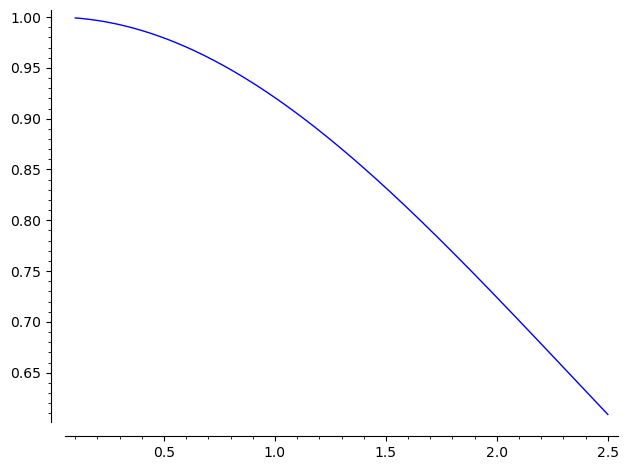

In [46]:
g2 = t^2 * exp(-t) / (1 - exp(-t))^2
plot(g2, (t, 0.1, 2.5))

In [58]:
dg2 = diff(g2, t)
print(dg2.factor())

assert dg2 == -t * exp(t) * ((t-2) * exp(t) + t + 2) / (exp(t) - 1)^3

-(t*e^t + t - 2*e^t + 2)*t*e^t/(e^t - 1)^3


Here's a plot of $t^2 (1 - E_2(it))$.

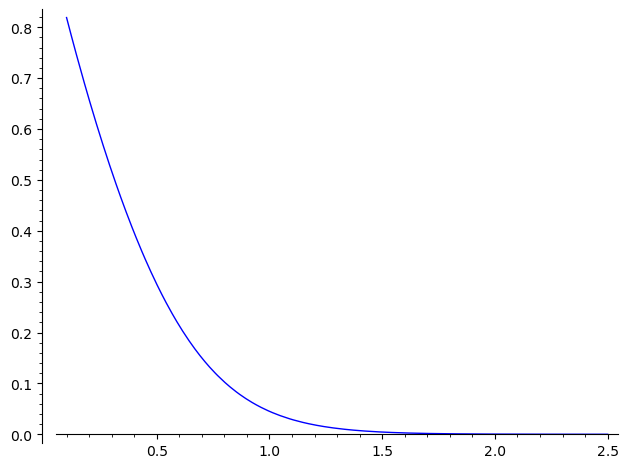

In [50]:
f_E2 = t^2 * (1 - qm_to_func(E2))
plot(f_E2, (t, 0.1, 2.5))

### Monotonicity of $t^3 X_{4, 2}(it)$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_3(t) = t^3 \frac{e^{-t}(1 + e^{-t})}{(1 - e^{-t})^3}
$$

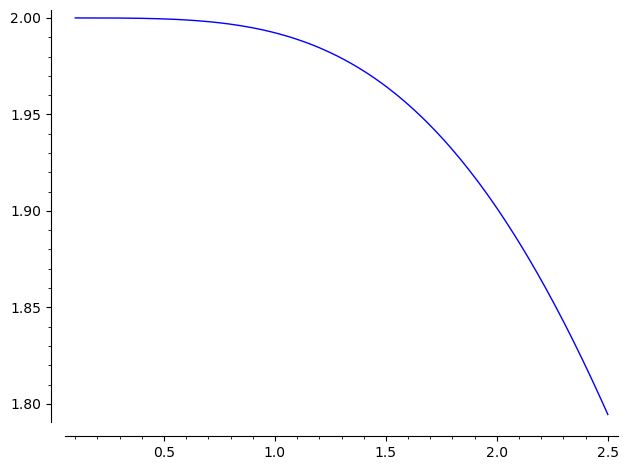

In [47]:
g3 = t^3 * exp(-t) * (1 + exp(-t)) / (1 - exp(-t))^3
plot(g3, (t, 0.1, 2.5))

In [57]:
dg3 = diff(g3, t)
print(dg3.factor())
num_g3 = t * (exp(2*t) + 4*exp(t) + 1) - 3 * (exp(2*t) - 1)
assert - exp(t) * t^2 * num_g3 / (exp(t) - 1)^4 == dg3

h3 = t / 3 - (exp(2 * t) - 1) / (exp(2 * t) + 4 * exp(t) + 1)
dh3 = diff(h3, t)
print(dh3.factor())
assert (exp(t) - 1)^4 / (3 * (exp(2*t) + 4*exp(t) + 1)^2) == dh3

-(t*e^(2*t) + 4*t*e^t + t - 3*e^(2*t) + 3)*t^2*e^t/(e^t - 1)^4
1/3*(e^t - 1)^4/(e^(2*t) + 4*e^t + 1)^2


Here's a plot of $t \mapsto t^3 X_{4, 2}(it)$.

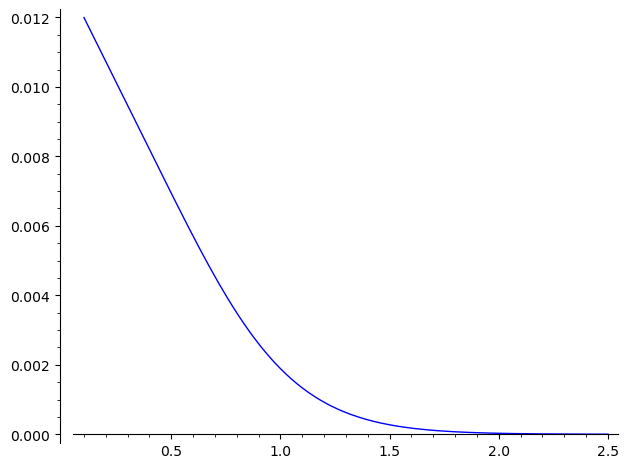

In [44]:
X_4_2 = extremal_qm(4, 2)
f_4_2 = t^3 * qm_to_func(X_4_2)
plot(f_4_2, (t, 0.1, 2.5))

### Monotonicity of $t^2 (E_2(2it) - E_2(it))$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_{2, 2}(t) := t^2 \left(\frac{e^{-t}}{(1 - e^{-t})^2} - \frac{e^{-2t}}{(1 - e^{-2t})^2}\right)
$$

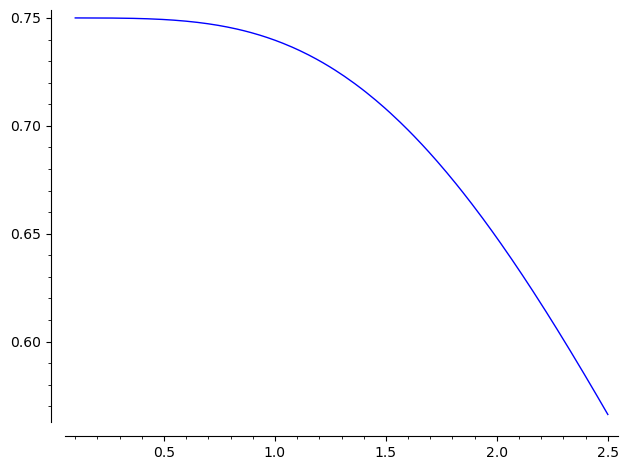

In [51]:
g22 = t^2 * (exp(-t) / (1 - exp(-t))^2 - exp(-2*t) / (1 - exp(-2*t))^2)
plot(g22, (t, 0.1, 2.5))

In [62]:
dg22 = diff(g22, t)
print(dg22.factor())
numer_22 = t * (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1) - 2 * (exp(t) + 1) * (exp(3*t) - 1)

h22 = t/2 - (exp(t) + 1) * (exp(3*t) - 1) / (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1)
assert dg22 == -2 * t * exp(t) * (exp(4*t) + 2 * exp(3*t) + 6 * exp(2*t) + 2 * exp(t) + 1) * h22 / (exp(2*t) - 1)^3
dh22 = diff(h22, t)
print(dh22.factor())


-(t*e^(4*t) + 2*t*e^(3*t) + 6*t*e^(2*t) + 2*t*e^t + t - 2*e^(4*t) - 2*e^(3*t) + 2*e^t + 2)*t*e^t/((e^t + 1)^3*(e^t - 1)^3)
1/2*(e^(2*t) + 4*e^t + 1)*(e^t + 1)^2*(e^t - 1)^4/(e^(4*t) + 2*e^(3*t) + 6*e^(2*t) + 2*e^t + 1)^2


For the monotonicity results related to $X_{6, 1}$ and $X_{8, 1}$, we define the following function: for $k \ge 0$,
$$
S_k(t) := \sum_{n \ge 1} n^k e^{-nt}.
$$

In [63]:
def Sk(k):
    """
    S_k(t) = \sum_{n=1}^{\infty} n^k e^(-nt).
    Compute by using the recurrence relation, S_{k+1}(t) = -d/dt S_k(t).
    S_0(t) = 1/(1 - e^(-t)).
    """
    if k == 0:
        return 1/(1 - exp(-t))
    else:
        return -diff(Sk(k-1), t)

In [64]:
for k in range(10):
    print(f"S_{k}(t) = {Sk(k).factor()}")

S_0(t) = e^t/(e^t - 1)
S_1(t) = e^t/(e^t - 1)^2
S_2(t) = (e^t + 1)*e^t/(e^t - 1)^3
S_3(t) = (e^(2*t) + 4*e^t + 1)*e^t/(e^t - 1)^4
S_4(t) = (e^(2*t) + 10*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^5
S_5(t) = (e^(4*t) + 26*e^(3*t) + 66*e^(2*t) + 26*e^t + 1)*e^t/(e^t - 1)^6
S_6(t) = (e^(4*t) + 56*e^(3*t) + 246*e^(2*t) + 56*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^7
S_7(t) = (e^(6*t) + 120*e^(5*t) + 1191*e^(4*t) + 2416*e^(3*t) + 1191*e^(2*t) + 120*e^t + 1)*e^t/(e^t - 1)^8
S_8(t) = (e^(6*t) + 246*e^(5*t) + 4047*e^(4*t) + 11572*e^(3*t) + 4047*e^(2*t) + 246*e^t + 1)*(e^t + 1)*e^t/(e^t - 1)^9
S_9(t) = (e^(8*t) + 502*e^(7*t) + 14608*e^(6*t) + 88234*e^(5*t) + 156190*e^(4*t) + 88234*e^(3*t) + 14608*e^(2*t) + 502*e^t + 1)*e^t/(e^t - 1)^10


### Monotonicity of $t^6 X_{8, 1}(it)$

From Lambert series expansion, it is enough to show that the monotonicity of
$$
g_6(t) := t^t S_6(t) = t^6 \frac{e^{-t} (e^{-5t} + 57 e^{-4t} + 302 e^{-3t} + 302 e^{-2t} + 57 e^{-t} + 1)}{(1 - e^{-t})^7}
$$

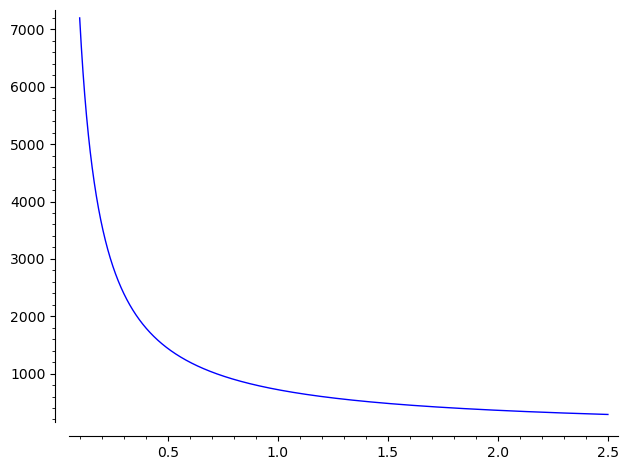

In [68]:
g6 = t^6 * Sk(6)
plot(g6, (t, 0.1, 2.5))

-(t*e^(6*t) + 120*t*e^(5*t) + 1191*t*e^(4*t) + 2416*t*e^(3*t) + 1191*t*e^(2*t) + 120*t*e^t + t - 6*e^(6*t) - 336*e^(5*t) - 1470*e^(4*t) + 1470*e^(2*t) + 336*e^t + 6)*t^5*e^t/(e^t - 1)^8


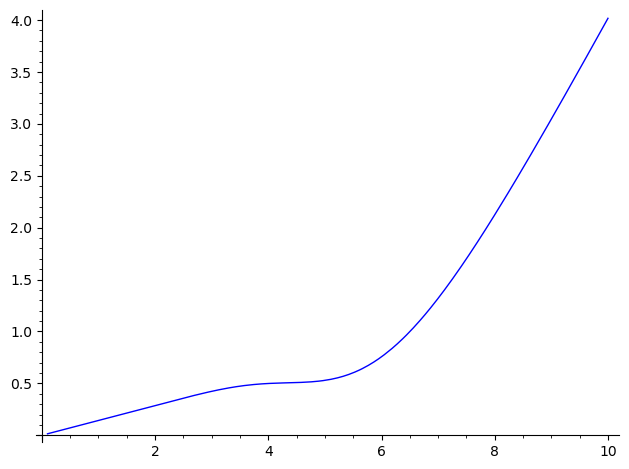

In [78]:
dg6 = diff(g6, t)
print(dg6.factor())

P = t^6 + 120 * t^5 + 1191 * t^4 + 2416 * t^3 + 1191 * t^2 + 120 * t + 1
Q = 6 * (t^6 + 56 * t^5 + 245 * t^4 - 245 * t^2 - 56 * t - 1)
Pexp = P.subs(t=exp(t))
Qexp = Q.subs(t=exp(t))

h6 = t - Qexp / Pexp
assert dg6 == -t^5 * exp(t) * Pexp * h6 / (exp(t) - 1)^8
plot(h6, (t, 0.1, 10))  # monotone increasing


In [83]:
dh6 = diff(h6, t)
dh6_ = dh6 * Pexp^2
print(dh6_.factor())

R = (t^6 - 72*t^5)^2 + (1 - 72*t)^2 + 246*(t^10 + t^2) + 23408*(t^9 + t^3) + 342687*(t^8 + t^4) + 754464*(t^7 + t^5) + 1377108*t^6
Rexp = R.subs(t=exp(t))
assert dh6_ == Rexp

e^(12*t) - 144*e^(11*t) + 5430*e^(10*t) + 23408*e^(9*t) + 342687*e^(8*t) + 754464*e^(7*t) + 1377108*e^(6*t) + 754464*e^(5*t) + 342687*e^(4*t) + 23408*e^(3*t) + 5430*e^(2*t) - 144*e^t + 1


Here is a plot of $t^6 X_{8, 1}(it)$.

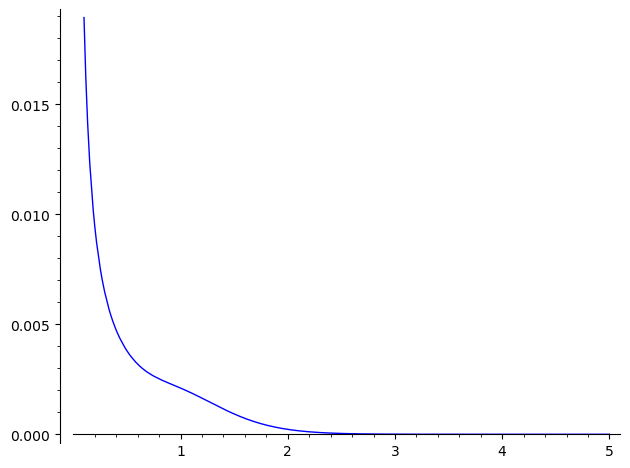

In [91]:
X_8_1 = extremal_qm(8, 1)
f_t6_X_8_1 = t^6 * qm_to_func(X_8_1)
plot(f_t6_X_8_1, (t, 0.1, 5.0))

Note that $t^7 X_{8, 1}(it)$ is not monotone.

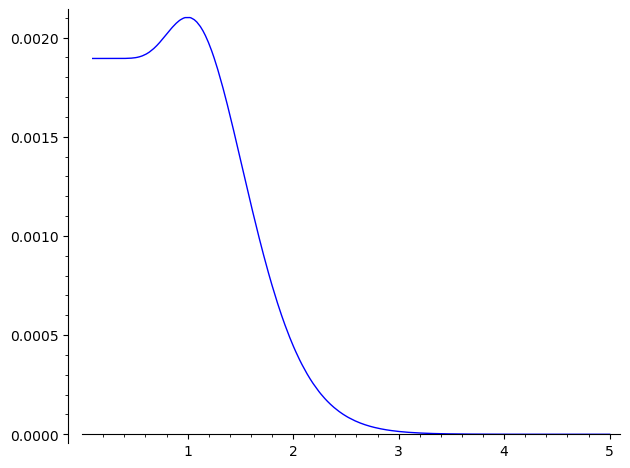

In [92]:
f_t7_X_8_1 = t^7 * qm_to_func(X_8_1)
plot(f_t7_X_8_1, (t, 0.1, 5.0))

### Monotonicity of $t^8 X_{10, 1}(it)$

From Lambert series expansion, it is enough to show the monotonicity of
$$
g_8(t) := t^8 S_8(t) = ^8 \frac{e^{-t} ((e^{-7t} + 1) + 247 (e^{-6t} + e^{-t}) + 4293 (e^{-5t} + e^{-2t}) + 15619 (e^{-4t} + e^{-3t}))}{(1 - e^{-t})^9}.
$$

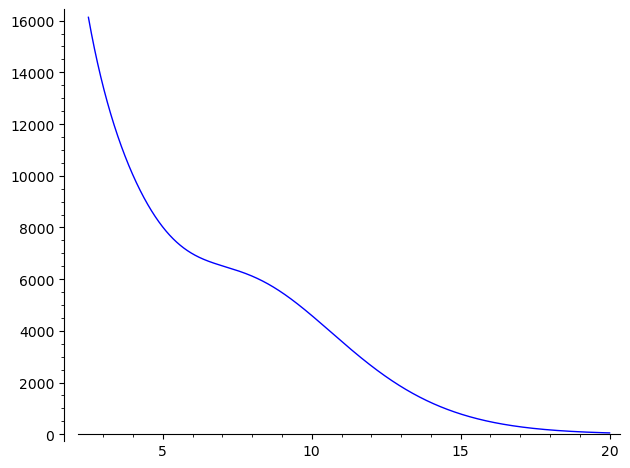

In [14]:
g8 = t^8 * Sk(8)
plot(g8, (t, 2.5, 20))

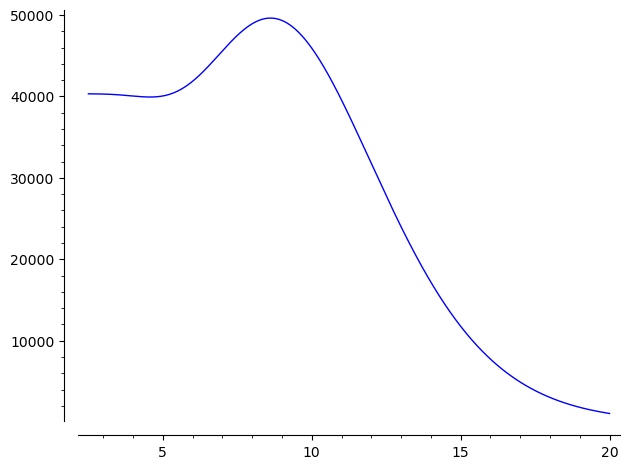

In [13]:
g9 = t^9 * Sk(8)
plot(g9, (t, 2.5, 20))

In [ ]:
dg8 = diff(g8, t)
print(dg8.simplify_full())

P = t^8 + 502*t^7 + 14608*t^6 + 88234*t^5 + 156190*t^4 + 88234*t^3 + 14608*t^2 + 502*t + 1
Q = 8*t^8 + 1968*t^7 + 32368*t^6 + 90608*t^5 - 90608*t^3 - 32368*t^2 - 1968*t - 8
Pexp = P.subs(t=e^t)
Qexp = Q.subs(t=e^t)
print(Pexp.simplify_full())
print(Qexp.simplify_full())

# Verify the derivative formula
diff_check = - t^7 * (t * Pexp - Qexp) * e^(t) / (e^t - 1)^10 - dg8
assert diff_check.simplify_full() == 0

-(156190*t^8*e^(5*t) + (t^8 - 8*t^7)*e^(9*t) + 2*(251*t^8 - 984*t^7)*e^(8*t) + 16*(913*t^8 - 2023*t^7)*e^(7*t) + 2*(44117*t^8 - 45304*t^7)*e^(6*t) + 2*(44117*t^8 + 45304*t^7)*e^(4*t) + 16*(913*t^8 + 2023*t^7)*e^(3*t) + 2*(251*t^8 + 984*t^7)*e^(2*t) + (t^8 + 8*t^7)*e^t)/(e^(10*t) - 10*e^(9*t) + 45*e^(8*t) - 120*e^(7*t) + 210*e^(6*t) - 252*e^(5*t) + 210*e^(4*t) - 120*e^(3*t) + 45*e^(2*t) - 10*e^t + 1)
e^(8*t) + 502*e^(7*t) + 14608*e^(6*t) + 88234*e^(5*t) + 156190*e^(4*t) + 88234*e^(3*t) + 14608*e^(2*t) + 502*e^t + 1
8*e^(8*t) + 1968*e^(7*t) + 32368*e^(6*t) + 90608*e^(5*t) - 90608*e^(3*t) - 32368*e^(2*t) - 1968*e^t - 8
0


In [ ]:
# Compute taylor expansion of f(t) = t P(t) - Q(t) = \sum_{n \ge 1} c(n) t^n / n!
R.<t> = PolynomialRing(QQ)
P_poly = R(P)
Q_poly = R(Q)

def c(n):
    s = 0
    for k in range(1, 9):
        s += (n * P_poly[k] - k * Q_poly[k]) * k^(n-1)
    if n == 1:
        s += 1
    return s

N = -1
for k in range(1, 9):
    N = max(N, k * Q_poly[k] / P_poly[k])
print(f"N = {N}")  # for n > N, the c(n) are guaranteed to be nonnegative
N = int(ceil(N))

for n in range(1, N + 1):
    print(f"c({n}) = {c(n)}")
    assert c(n) >= 0

N = 64
c(1) = 40320
c(2) = 322560
c(3) = 2036160
c(4) = 11934720
c(5) = 68140800
c(6) = 386426880
c(7) = 2196865440
c(8) = 12579517440
c(9) = 72731655360
c(10) = 425141337600
c(11) = 2513898868320
c(12) = 15039893352960
c(13) = 91031905687680
c(14) = 557309766343680
c(15) = 3449988801856800
c(16) = 21587682544404480
c(17) = 136495168951901760
c(18) = 871827016870494720
c(19) = 5624159286451891680
c(20) = 36639242915992819200
c(21) = 241029564146259033600
c(22) = 1601070031370483896320
c(23) = 10738193773037766809760
c(24) = 72703442032970562616320
c(25) = 496749825897395204491200
c(26) = 3423376621152422316910080
c(27) = 23779089427158513893823840
c(28) = 166329348976151521726487040
c(29) = 1170362141001599280365554560
c(30) = 8274643668229066542307353600
c(31) = 58712859415867979560315122720
c(32) = 417586772693084105750470594560
c(33) = 2973569262321847817020543375680
c(34) = 21175815072386767732881724500480
c(35) = 150652603720713668040147721471200
c(36) = 10697042961001271197356044

Here is a plot of $t^8 X_{10,1}(it)$.

In [ ]:
X_10_1 = extremal_qm(10, 1)
f_t8_X_10_1 = t^8 * qm_to_func(X_10_1)
plot(f_t8_X_10_1, (t, 0.1, 5.0))

Note that $t^9 X_{10,1}(it)$ is not monotone.

In [ ]:
f_t9_X_10_1 = t^9 * qm_to_func(X_10_1)
plot(f_t9_X_10_1, (t, 0.1, 5.0))

## Using Proposition 3.7

### Monotonicity of $t^5 X_{6, 1}(it)$

Monotonocity follows from the limit computation and the identity
$$
6 (X_{6, 1}')^2 - 5 X_{6, 1}'' X_{6, 1} = \Delta X_{4, 2}
$$

In [86]:
X_6_1 = extremal_qm(6, 1)
DX_6_1 = X_6_1.derivative()
DDX_6_1 = DX_6_1.derivative()
X_4_2 = extremal_qm(4, 2)

aux_6_1 = 6 * DX_6_1^2 - 5 * DDX_6_1 * X_6_1
print_qm(aux_6_1, "12 * (X_6,1')^2 - 11 * (X_6,1'') * X_6,1")
assert aux_6_1 == Disc * X_4_2

12 * (X_6,1')^2 - 11 * (X_6,1'') * X_6,1

q_expansion q^2 - 18*q^3 + 120*q^4 - 220*q^5 - 1620*q^6 + 11676*q^7 - 30400*q^8 + 19440*q^9 + 73230*q^10 - 141350*q^11 + 22176*q^12 - 296268*q^13 + 1701560*q^14 - 1436940*q^15 - 5091840*q^16 + 11674176*q^17 - 5006043*q^18 - 7325370*q^19 + O(q^20) 

weight 16
depth 2
cusp order 2
polynomial (-1/497664) * (-E2^2 + E4) * (-E4^3 + E6^2) 



### Monotonicity of $t^{11} X_{12, 1}(it)$

Monotonicity follows from the limit computation and the identity
$$
12 (X_{12, 1}')^2 - 11 X_{12, 1}'' X_{12, 1} = \frac{1}{2^{10} \cdot 3^{6} \cdot 5^{2} \cdot 7^{2}} \cdot \Delta F.
$$
where
$$
F = 49 E_2^2 E_4^3 - 25 E_2^2 E_6^2 - 48 E_2 E_4^2 E_6 - 25 E_4^4 + 49 E_4 E_6^2
$$

In [ ]:
X_12_1 = extremal_qm(12, 1)
DX_12_1 = X_12_1.derivative()
DDX_12_1 = DX_12_1.derivative()

aux_12_1 = 12 * DX_12_1 ^ 2 - 11 * DDX_12_1 * X_12_1
print_qm(aux_12_1, "12 * (X_12,1')^2 - 11 * (X_12,1'') * X_12,1")

F = (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2)
assert aux_12_1 == 1 / (2^10 * 3^6 * 5^2 * 7^2) * Disc * F


12 * (X_12,1') - 11 * (X_12,1'') * X_12,1

q_expansion 4*q^4 + 56*q^5 + 168*q^6 - 4928*q^7 + 4384*q^8 + 76464*q^9 - 121744*q^10 + 41536*q^11 - 3998736*q^12 + 16213624*q^13 - 12220208*q^14 - 691008*q^15 - 170570496*q^16 + 605663408*q^17 - 1208530368*q^18 + 3079105344*q^19 + O(q^20) 

weight 28
depth 2
cusp order 4
polynomial (-1/1580182732800) * (-E4^3 + E6^2) * (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2) 



### Monotonicity of $t^{13} X_{14, 1}(it)$

Monotonicity follows from the limit computation and the identity
$$
14 (X_{14, 1}')^2 - 13 X_{14, 1}'' X_{14, 1} = 4 \Delta^2 X_{8, 2}.
$$

In [28]:
X_14_1 = extremal_qm(14, 1)
DX_14_1 = X_14_1.derivative()
DDX_14_1 = DX_14_1.derivative()
X_8_2 = extremal_qm(8, 2)

aux_14_1 = 14 * DX_14_1 ^ 2 - 13 * DDX_14_1 * X_14_1
print_qm(aux_14_1, "14 * (X_14,1') - 13 * (X_14,1'') * X_14,1")

assert aux_14_1 == 4 * Disc^2 * X_8_2

14 * (X_14,1') - 13 * (X_14,1'') * X_14,1

q_expansion 4*q^4 - 128*q^5 + 1656*q^6 - 8960*q^7 - 21280*q^8 + 684288*q^9 - 4972528*q^10 + 17223680*q^11 - 6607440*q^12 - 221786240*q^13 + 1067785712*q^14 - 2220800256*q^15 + 815953152*q^16 + 5019685120*q^17 - 1839412800*q^18 - 22470687744*q^19 + O(q^20) 

weight 32
depth 2
cusp order 4
polynomial (1/270888468480) * (-7*E2^2*E4 + 2*E2*E6 + 5*E4^2) * (-E4^3 + E6^2)^2 



In [9]:
print(df8.simplify_full())

-(156190*t^8*e^(5*t) + (t^8 - 8*t^7)*e^(9*t) + 2*(251*t^8 - 984*t^7)*e^(8*t) + 16*(913*t^8 - 2023*t^7)*e^(7*t) + 2*(44117*t^8 - 45304*t^7)*e^(6*t) + 2*(44117*t^8 + 45304*t^7)*e^(4*t) + 16*(913*t^8 + 2023*t^7)*e^(3*t) + 2*(251*t^8 + 984*t^7)*e^(2*t) + (t^8 + 8*t^7)*e^t)/(e^(10*t) - 10*e^(9*t) + 45*e^(8*t) - 120*e^(7*t) + 210*e^(6*t) - 252*e^(5*t) + 210*e^(4*t) - 120*e^(3*t) + 45*e^(2*t) - 10*e^t + 1)


(t*e^(8*t) + 502*t*e^(7*t) + 14608*t*e^(6*t) + 88234*t*e^(5*t) + 156190*t*e^(4*t) + 88234*t*e^(3*t) + 14608*t*e^(2*t) + 502*t*e^t + t - 8*e^(8*t) - 1968*e^(7*t) - 32368*e^(6*t) - 90608*e^(5*t) + 90608*e^(3*t) + 32368*e^(2*t) + 1968*e^t + 8)*t^7


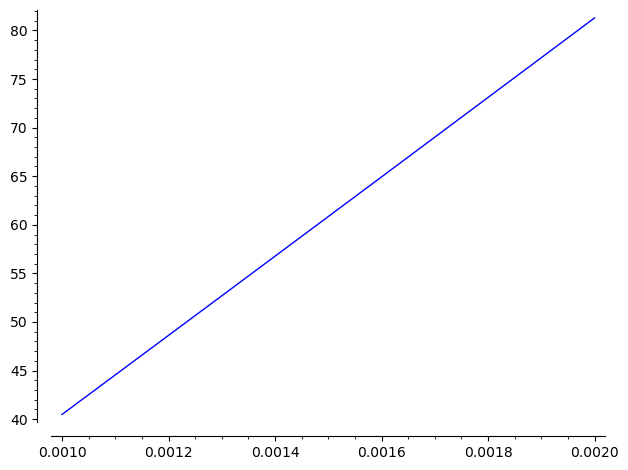

In [18]:
denom_df8 = 156190*t^8*e^(5*t) + (t^8 - 8*t^7)*e^(9*t) + 2*(251*t^8 - 984*t^7)*e^(8*t) + 16*(913*t^8 - 2023*t^7)*e^(7*t) + 2*(44117*t^8 - 45304*t^7)*e^(6*t) + 2*(44117*t^8 + 45304*t^7)*e^(4*t) + 16*(913*t^8 + 2023*t^7)*e^(3*t) + 2*(251*t^8 + 984*t^7)*e^(2*t) + (t^8 + 8*t^7)*e^t
denom_df8 /= e^t
print(denom_df8.simplify_full().factor())
denom_df8 = (t*e^(8*t) + 502*t*e^(7*t) + 14608*t*e^(6*t) + 88234*t*e^(5*t) + 156190*t*e^(4*t) + 88234*t*e^(3*t) + 14608*t*e^(2*t) + 502*t*e^t + t - 8*e^(8*t) - 1968*e^(7*t) - 32368*e^(6*t) - 90608*e^(5*t) + 90608*e^(3*t) + 32368*e^(2*t) + 1968*e^t + 8)
plot(denom_df8, (t, 0.001, 0.002))

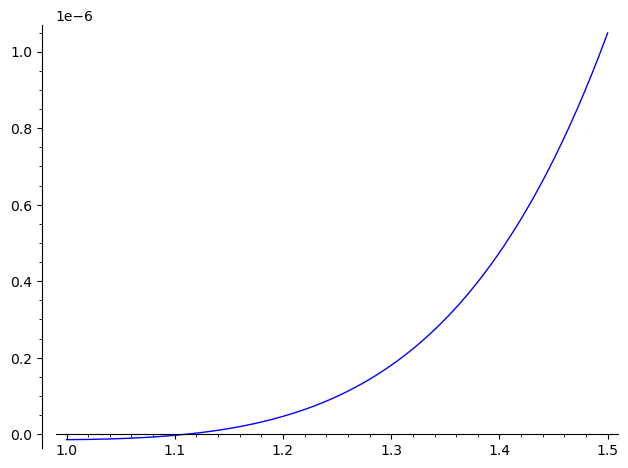

In [6]:
S7 = Sk(7)
S8 = Sk(8)
S9 = Sk(9)
psi7 = S7 / (t * S8)
psi8 = S8 / (t * S9)

# plot(t^8 * S7, (t, 0.1, 1.7))
# plot(1/8 - psi8, (t, 0.5, 1.2))
# plot(1/8 - psi8, (t, 0.2, 0.5))
plot(1/8 - psi7, (t, 1.0, 1.5))

x^8 + 502*x^7 + 14608*x^6 + 88234*x^5 + 156190*x^4 + 88234*x^3 + 14608*x^2 + 502*x + 1
(8) * (x - 1) * (x + 1) * (x^6 + 246*x^5 + 4047*x^4 + 11572*x^3 + 4047*x^2 + 246*x + 1)
x^6 + 246*x^5 + 4047*x^4 + 11572*x^3 + 4047*x^2 + 246*x + 1
-1/8*(2*t*e^(16*t) + 2008*t*e^(15*t) + 562440*t*e^(14*t) + 29685800*t*e^(13*t) + 604585960*t*e^(12*t) + 5469671544*t*e^(11*t) + 24874203896*t*e^(10*t) + 60310097800*t*e^(9*t) + 80786169900*t*e^(8*t) + 60310097800*t*e^(7*t) + 24874203896*t*e^(6*t) + 5469671544*t*e^(5*t) + 604585960*t*e^(4*t) + 29685800*t*e^(3*t) + 562440*t*e^(2*t) + 2008*t*e^t + 2*t - e^(18*t) + 1044*e^(17*t) - 112243*e^(16*t) - 510312*e^(15*t) - 43138416*e^(14*t) - 367441384*e^(13*t) - 2794017480*e^(12*t) - 11938040520*e^(11*t) - 29528194714*e^(10*t) - 31393843648*e^(9*t) + 3171178746*e^(8*t) + 34356770248*e^(7*t) + 27764611464*e^(6*t) + 9250967784*e^(5*t) + 1427286064*e^(4*t) + 92085864*e^(3*t) + 2386563*e^(2*t) + 10924*e^t + 17)*e^(2*t)/((e^(8*t) + 502*e^(7*t) + 14608*e^(6*t) + 88234*e^

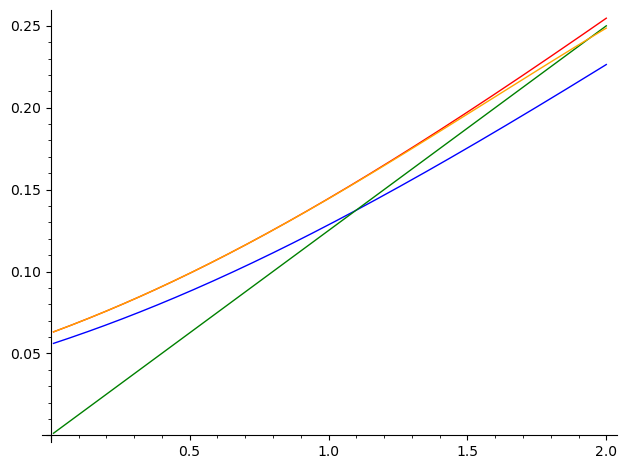

In [32]:
R.<x> = QQ['x']
A = (x^8 + 1) + 502*(x^7 + x) + 14608*(x^6 + x^2) + 88234*(x^5 + x^3) + 156190*x^4
B = 8*(x^8 - 1) + 1968*(x^7 - x) + 32368*(x^6 - x^2) + 90608*(x^5 - x^3)
C = (x^6 + 246*x^5 + 4047*x^4 + 11572*x^3 + 4047*x^2 + 246*x + 1)
print(A.factor())
print(B.factor())
print(C.factor())


Q1 = C.subs(x = exp(-t)) / A.subs(x = exp(-t))
Q2 = t / (8 * (1 - exp(-2*t)))
deltaQ = Q2 - Q1
print(diff(deltaQ, t).simplify_full().factor())

low_t = 0.01
high_t = 2.0
plot(Q1, (t, low_t, high_t)) + plot(Q2, (t, low_t, high_t), color='red') + plot(lambda t : t / 8, (t, low_t, high_t), color='green') + plot(lambda t : t/16 + 1/16 + t^2 / 48 - t^4 / 720, (t, low_t, high_t), color='orange')



In [29]:
D = 2 * (x^16 + 1) + 2008 * (x^15 + x) + 562440 * (x^14 + x^2) + 29685800 * (x^13 + x^3) + 604585960 * (x^12 + x^4) + 5469671544 * (x^11 + x^5) + 24874203896 * (x^10 + x^6) + 60310097800 * (x^9 + x^7) + 8078616900 * x^8


In [2]:
@lru_cache(None)
def alpha0(w):
    assert w >= 6 and w % 2 == 0, "w must be an even integer >= 6"
    if w == 6:
        return -1/720
    elif w % 6 == 2:
        return - (w - 3) / (w - 1) * alpha0(w - 2)
    elif w % 6 == 4:
        return alpha0(w - 4)
    else:  # w % 6 == 0 and w >= 12
        return - (w - 6) * w / (432 * (w - 5) * (w - 1)) * alpha0(w - 6)

def beta0(w):
    return -alpha0(w + 2)

In [3]:
for w in range(6, 100, 6):
    k = w / 6
    a = (-1)^k * factorial(k) * factorial(2*k) * factorial(3*k) / factorial(6*k) / 12 / k
    print(f"w = {w}: alpha_w,0 = {alpha0(w)}, expected = {a}, difference = {alpha0(w) - a}")

w = 6: alpha_w,0 = -1/720, expected = -1/720, difference = 0
w = 12: alpha_w,0 = 1/332640, expected = 1/332640, difference = 0
w = 18: alpha_w,0 = -1/147026880, expected = -1/147026880, difference = 0
w = 24: alpha_w,0 = 1/64250746560, expected = 1/64250746560, difference = 0
w = 30: alpha_w,0 = -1/27949074753600, expected = -1/27949074753600, difference = 0
w = 36: alpha_w,0 = 1/12129898443062400, expected = 1/12129898443062400, difference = 0
w = 42: alpha_w,0 = -1/5257444553750188800, expected = -1/5257444553750188800, difference = 0
w = 48: alpha_w,0 = 1/2276849023527671049600, expected = 1/2276849023527671049600, difference = 0
w = 54: alpha_w,0 = -1/985496152350226952635200, expected = -1/985496152350226952635200, difference = 0
w = 60: alpha_w,0 = 1/426391335250198194840163200, expected = 1/426391335250198194840163200, difference = 0
w = 66: alpha_w,0 = -1/184433633920040273731772409600, expected = -1/184433633920040273731772409600, difference = 0
w = 72: alpha_w,0 = 1/797591633

In [4]:
def modular_comp(qm):
    # Extract modular form components of a given quasimodular form
    # In other words, if F = f_0 + f_1 E2 + f_2 E2^2 + ... + f_n E2^n,
    # return [f_0, f_1, f_2, ..., f_n]
    comps = {}
    for k, v in qm._polynomial().dict().items():
        if k not in comps:
            comps[k] = QM(0)
        comps[k] += QM(v)
    return comps

for w in range(12, 160, 6):
    # Xw1 = extremal_qm(w, 1)
    # comps = modular_comp(Xw1)
    # Aw = comps[0]
    # Bwm2 = comps[1]
    # alpha_w0, alpha_w1 = tuple(qm_coefficients(Aw, 2))
    # beta_wm2_0, beta_wm2_1 = tuple(qm_coefficients(Bwm2, 2))
    # print("normalized")
    # Aw_norm = Aw / alpha_w0
    # Bwm2_norm = Bwm2 / beta_wm2_0
    # print(f"alpha_{w},1 / alpha_{w},0 = {qm_coefficients(Aw_norm, 2)[1]}")
    # print(f"beta_{w-2},1 / beta_{w-2},0 = {qm_coefficients(Bwm2_norm, 2)[1]}")

    # Xw21 = extremal_qm(w + 2, 1)
    # comps_p2 = modular_comp(Xw21)
    # Aw2 = comps_p2[0]
    # Bw = comps_p2[1]
    # alpha_wp2_0, alpha_wp2_1 = tuple(qm_coefficients(Aw2, 2))
    # beta_w_0, beta_w_1 = tuple(qm_coefficients(Bw, 2))
    # print("normalized")
    # Aw2_norm = Aw2 / alpha_wp2_0
    # Bw_norm = Bw / beta_w_0
    # print(f"alpha_{w+2},1 / alpha_{w+2},0 = {qm_coefficients(Aw2_norm, 2)[1]}", 2*(w^2 - 9*w - 24) / (w/6 - 1))
    # print(f"beta_{w},1 / beta_{w},0 = {qm_coefficients(Bw_norm, 2)[1]}", 2*(w-12)*(w+1) / (w/6 - 1))

    Xw41 = extremal_qm(w + 4, 1)
    comps_p4 = modular_comp(Xw41)
    Aw4 = comps_p4[0]
    Bwm2_p4 = comps_p4[1]
    alpha_wp4_0, alpha_wp4_1 = tuple(qm_coefficients(Aw4, 2))
    beta_wm2_p4_0, beta_wm2_p4_1 = tuple(qm_coefficients(Bwm2_p4, 2))
    print("normalized")
    Aw4_norm = Aw4 / alpha_wp4_0
    Bwm2_p4_norm = Bwm2_p4 / beta_wm2_p4_0
    print(f"alpha_{w+4},1 / alpha_{w+4},0 = {qm_coefficients(Aw4_norm, 2)[1]}", 2*(w^2-19*w+108) / (w/6-1))
    print(f"beta_{w-2},1 / beta_{w-2},0 = {qm_coefficients(Bwm2_p4_norm, 2)[1]}", 2*(w^2-21*w+120) / (w/6-1))

normalized
alpha_16,1 / alpha_16,0 = -48 48
beta_10,1 / beta_10,0 = -24 24
normalized
alpha_22,1 / alpha_22,0 = -90 90
beta_16,1 / beta_16,0 = -66 66
normalized
alpha_28,1 / alpha_28,0 = -152 152
beta_22,1 / beta_22,0 = -128 128
normalized
alpha_34,1 / alpha_34,0 = -219 219
beta_28,1 / beta_28,0 = -195 195
normalized
alpha_40,1 / alpha_40,0 = -288 288
beta_34,1 / beta_34,0 = -264 264
normalized
alpha_46,1 / alpha_46,0 = -358 358
beta_40,1 / beta_40,0 = -334 334
normalized
alpha_52,1 / alpha_52,0 = -3000/7 3000/7
beta_46,1 / beta_46,0 = -2832/7 2832/7
normalized
alpha_58,1 / alpha_58,0 = -999/2 999/2
beta_52,1 / beta_52,0 = -951/2 951/2
normalized
alpha_64,1 / alpha_64,0 = -1712/3 1712/3
beta_58,1 / beta_58,0 = -1640/3 1640/3
normalized
alpha_70,1 / alpha_70,0 = -642 642
beta_64,1 / beta_64,0 = -618 618
normalized
alpha_76,1 / alpha_76,0 = -7848/11 7848/11
beta_70,1 / beta_70,0 = -7584/11 7584/11
normalized
alpha_82,1 / alpha_82,0 = -785 785
beta_76,1 / beta_76,0 = -761 761
normalized
a

In [5]:
X_121 = extremal_qm(12, 1)
print_qm(X_121, "X_12,1")
comps = modular_comp(X_121)
A_12 = comps[0]
B_10 = comps[1]
print_qm(A_12, "A_12")
print_qm(B_10, "B_10")

X_141 = extremal_qm(14, 1)
print_qm(X_141, "X_14,1")
comps = modular_comp(X_141)
A_14 = comps[0]
B_12 = comps[1]
print_qm(A_14, "A_14")
print_qm(B_12, "B_12")

X_161 = extremal_qm(16, 1)
print_qm(X_161, "X_16,1")
comps = modular_comp(X_161)
A_16 = comps[0]
B_14 = comps[1]
print_qm(A_16, "A_16")
print_qm(B_14, "B_14")


X_12,1

q_expansion q^2 + 56*q^3 + 1002*q^4 + 9296*q^5 + 57708*q^6 + 269040*q^7 + 1024532*q^8 + 3321024*q^9 + 9542526*q^10 + 24701800*q^11 + 59087672*q^12 + 131294352*q^13 + 276018296*q^14 + 549217872*q^15 + 1049202216*q^16 + 1920000768*q^17 + 3407256981*q^18 + 5839100568*q^19 + O(q^20) 

weight 12
depth 1
cusp order 2
polynomial (1/3991680) * (-12*E2*E4*E6 + 5*E4^3 + 7*E6^2) 

A_12

q_expansion 1/332640 - 1/1155*q + 471/770*q^2 + 8284/165*q^3 + 2767069/2310*q^4 + 153042/11*q^5 + 5691038/55*q^6 + 93003352/165*q^7 + 377247891/154*q^8 + 10331889643/1155*q^9 + 313709811/11*q^10 + 31311101796/385*q^11 + 34963464202/165*q^12 + 84291300454/165*q^13 + 63519092364/55*q^14 + 27121900472/11*q^15 + 11589512541853/2310*q^16 + 537307060374/55*q^17 + 14113152490147/770*q^18 + 1095783506588/33*q^19 + O(q^20) 

weight 12
depth 0
cusp order 0
polynomial (1/3991680) * (5*E4^3 + 7*E6^2) 

B_10

q_expansion -1/332640 + 1/1260*q + 57/140*q^2 + 703/45*q^3 + 262657/1260*q^4 + 15501/10*q^5 + 40071/5*q^6 + 100

In [8]:
X_81 = extremal_qm(8, 1)
print_qm(X_81, "X_8,1")
DX_81 = X_81.derivative()
print_qm(DX_81, "D X_8,1")
DDX_81 = DX_81.derivative()
print_qm(DDX_81, "D^2 X_8,1")

X_101 = extremal_qm(10, 1)
print_qm(X_101, "X_10,1")
DX_101 = X_101.derivative()
print_qm(DX_101, "D X_10,1")

X_8,1

q_expansion q + 66*q^2 + 732*q^3 + 4228*q^4 + 15630*q^5 + 48312*q^6 + 117656*q^7 + 270600*q^8 + 533637*q^9 + 1031580*q^10 + 1771572*q^11 + 3094896*q^12 + 4826822*q^13 + 7765296*q^14 + 11441160*q^15 + 17318416*q^16 + 24137586*q^17 + 35220042*q^18 + 47045900*q^19 + O(q^20) 

weight 8
depth 1
cusp order 1
polynomial (-1/1008) * (E2*E6 - E4^2) 

D X_8,1

q_expansion q + 132*q^2 + 2196*q^3 + 16912*q^4 + 78150*q^5 + 289872*q^6 + 823592*q^7 + 2164800*q^8 + 4802733*q^9 + 10315800*q^10 + 19487292*q^11 + 37138752*q^12 + 62748686*q^13 + 108714144*q^14 + 171617400*q^15 + 277094656*q^16 + 410338962*q^17 + 633960756*q^18 + 893872100*q^19 + O(q^20) 

weight 10
depth 2
cusp order 1
polynomial (-1/1728) * (E2^2*E6 - 2*E2*E4^2 + E4*E6) 

D^2 X_8,1

q_expansion q + 264*q^2 + 6588*q^3 + 67648*q^4 + 390750*q^5 + 1739232*q^6 + 5765144*q^7 + 17318400*q^8 + 43224597*q^9 + 103158000*q^10 + 214360212*q^11 + 445665024*q^12 + 815732918*q^13 + 1521998016*q^14 + 2574261000*q^15 + 4433514496*q^16 + 6975762354

In [10]:
qm_find_lin_comb(DX_81, [
    extremal_qm(10, 2),
    extremal_qm(10, 1),
    extremal_qm(6, 1) * E4,
])

(-126, 1, 0)

In [15]:
qm_find_lin_comb(
    X_101,
    [
        extremal_qm(12, 2),
        extremal_qm(12, 1),
        extremal_qm(8, 2) * E4,
        extremal_qm(6, 1) * E6,
    ],
    N=100
)

ValueError: matrix equation has no solutions

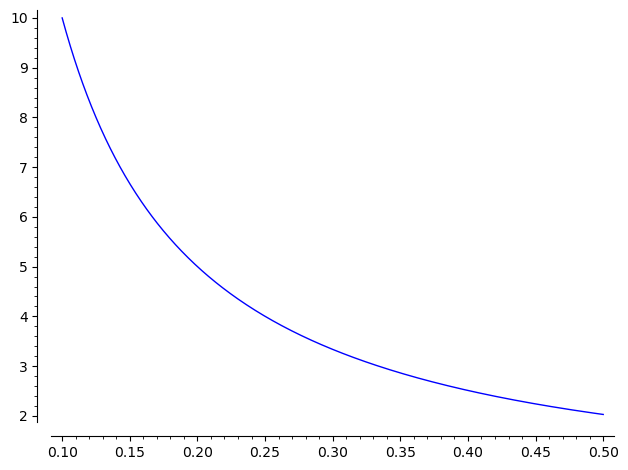

In [18]:
e4 = qm_to_func(E4)
e6 = qm_to_func(E6)
ftn = t^4 * (e4 - 1)
ftn = t^5 * (1 - e6)
plot(ftn, (t, 0.1, 0.5))

In [53]:
print_qm2(H2, "H_2")
print_qm2(H4, "H_4")
print_qm2(H2 + 2 * H4, "H_2 + 2 H_4")
print_qm2(E2_, "E2")
print_qm2((H2 + 2 * H4 + 2 * E2_) / 4, "H_2 + 2 H_4 + 2 E2")

H_2

q_expansion 16*qh + 64*qh^3 + 96*qh^5 + 128*qh^7 + 208*qh^9 + 192*qh^11 + 224*qh^13 + 384*qh^15 + 288*qh^17 + 320*qh^19 + 512*qh^21 + 384*qh^23 + 496*qh^25 + 640*qh^27 + 480*qh^29 + Order(qh^30) 

weight 2
depth 0
cusp order 1/2
polynomial H2 

H_4

q_expansion 1 + (-8)*qh + 24*qh^2 + (-32)*qh^3 + 24*qh^4 + (-48)*qh^5 + 96*qh^6 + (-64)*qh^7 + 24*qh^8 + (-104)*qh^9 + 144*qh^10 + (-96)*qh^11 + 96*qh^12 + (-112)*qh^13 + 192*qh^14 + (-192)*qh^15 + 24*qh^16 + (-144)*qh^17 + 312*qh^18 + (-160)*qh^19 + 144*qh^20 + (-256)*qh^21 + 288*qh^22 + (-192)*qh^23 + 96*qh^24 + (-248)*qh^25 + 336*qh^26 + (-320)*qh^27 + 192*qh^28 + (-240)*qh^29 + Order(qh^30) 

weight 2
depth 0
cusp order 0
polynomial H4 

H_2 + 2 H_4

q_expansion 2 + 48*qh^2 + 48*qh^4 + 192*qh^6 + 48*qh^8 + 288*qh^10 + 192*qh^12 + 384*qh^14 + 48*qh^16 + 624*qh^18 + 288*qh^20 + 576*qh^22 + 192*qh^24 + 672*qh^26 + 384*qh^28 + Order(qh^30) 

weight 2
depth 0
cusp order 0
polynomial H2 + 2*H4 

E2

q_expansion 1 + (-24)*qh^2 + (-72)*qh^

In [55]:
print_qm2(E4_, "E4")
print_qm2(H2^2, "H_2^2")
print_qm2((H2 + 2 * H4)^2, "(H_2 + 2 H_4)^2")
print_qm2(E4_ - (15 / 16) * H2^2, "E4 - (15/16) H_2^2")

E4

q_expansion 1 + 240*qh^2 + 2160*qh^4 + 6720*qh^6 + 17520*qh^8 + 30240*qh^10 + 60480*qh^12 + 82560*qh^14 + 140400*qh^16 + 181680*qh^18 + 272160*qh^20 + 319680*qh^22 + 490560*qh^24 + 527520*qh^26 + 743040*qh^28 + Order(qh^30) 

weight 4
depth 0
cusp order 0
polynomial H2^2 + H2*H4 + H4^2 

H_2^2

q_expansion 256*qh^2 + 2048*qh^4 + 7168*qh^6 + 16384*qh^8 + 32256*qh^10 + 57344*qh^12 + 88064*qh^14 + 131072*qh^16 + 193792*qh^18 + 258048*qh^20 + 340992*qh^22 + 458752*qh^24 + 562688*qh^26 + 704512*qh^28 + Order(qh^30) 

weight 4
depth 0
cusp order 1
polynomial H2^2 

(H_2 + 2 H_4)^2

q_expansion 4 + 192*qh^2 + 2496*qh^4 + 5376*qh^6 + 20928*qh^8 + 24192*qh^10 + 69888*qh^12 + 66048*qh^14 + 168384*qh^16 + 145344*qh^18 + 314496*qh^20 + 255744*qh^22 + 585984*qh^24 + 422016*qh^26 + 858624*qh^28 + Order(qh^30) 

weight 4
depth 0
cusp order 0
polynomial (H2 + 2*H4)^2 

E4 - (15/16) H_2^2

q_expansion 1 + 240*qh^4 + 2160*qh^8 + 6720*qh^12 + 17520*qh^16 + 30240*qh^20 + 60480*qh^24 + 82560*qh^28 + Or

In [59]:
print_qm2(E6_, "E6")
print_qm2(H2^2 * (H2 + 2 * H4), "H_2^2 * (H_2 + 2 H_4)")
print_qm2(E6_ + (504 / 512) * H2^2 * (H2 + 2 * H4), "E6 + (504/512) H_2^2 * (H_2 + 2 H_4)")

E6

q_expansion 1 + (-504)*qh^2 + (-16632)*qh^4 + (-122976)*qh^6 + (-532728)*qh^8 + (-1575504)*qh^10 + (-4058208)*qh^12 + (-8471232)*qh^14 + (-17047800)*qh^16 + (-29883672)*qh^18 + (-51991632)*qh^20 + (-81170208)*qh^22 + (-129985632)*qh^24 + (-187132176)*qh^26 + (-279550656)*qh^28 + Order(qh^30) 

weight 6
depth 0
cusp order 0
polynomial (-1/2) * (H2 - H4) * (H2 + 2*H4) * (2*H2 + H4) 

H_2^2 * (H_2 + 2 H_4)

q_expansion 512*qh^2 + 16384*qh^4 + 124928*qh^6 + 524288*qh^8 + 1600512*qh^10 + 3997696*qh^12 + 8605696*qh^14 + 16777216*qh^16 + 30358016*qh^18 + 51216384*qh^20 + 82458624*qh^22 + 127926272*qh^24 + 190102528*qh^26 + 275382272*qh^28 + Order(qh^30) 

weight 6
depth 0
cusp order 1
polynomial (H2 + 2*H4) * H2^2 

E6 + (504/512) H_2^2 * (H_2 + 2 H_4)

q_expansion 1 + (-504)*qh^4 + (-16632)*qh^8 + (-122976)*qh^12 + (-532728)*qh^16 + (-1575504)*qh^20 + (-4058208)*qh^24 + (-8471232)*qh^28 + Order(qh^30) 

weight 6
depth 0
cusp order 0
polynomial (-1/64) * (H2 + 2*H4) * (H2^2 - 32*H2*H4 - 3

In [60]:
E2_2z = (H2 + 2 * H4 + 2 * E2_) / 4
E4_2z = (H2^2 + 16 * H2 * H4 + 16 * H4^2) / 16
E6_2z = - (H2 + 2 * H4) * (H2^2 - 32 * H2 * H4 - 32 * H4^2) / 64

def l1_z_to_2z(qm):
    # Convert level 1 quasimodular form F(z) to level 2 quasimodular form F(2z)
    r = QM2(0)
    for (d2, d4, d6), coeff in qm.polynomial().dict().items():
        r += coeff * E2_2z^d2 * E4_2z^d4 * E6_2z^d6
    return r

In [68]:
for w in range(4, 30, 2):
    if w == 6:
        continue
    X_w_2 = extremal_qm(w, 2)
    # print_qm(X_w_2, f"X_{w},2")
    X_w_2_2z = l1_z_to_2z(X_w_2)
    # print_qm2(X_w_2_2z, f"X_{w},2 (2z)")
    Y_w_2 = l1_to_l2(X_w_2) - 2^(w-2) * X_w_2_2z
    # print_qm2(l1_to_l2(X_w_2), f"L1 to L2 of X_{w},2")
    print_qm2(Y_w_2, f"Y_{w},2")

Y_4,2

q_expansion 1*qh^2 + 2*qh^4 + 12*qh^6 + 4*qh^8 + 30*qh^10 + 24*qh^12 + 56*qh^14 + 8*qh^16 + 117*qh^18 + 60*qh^20 + 132*qh^22 + 48*qh^24 + 182*qh^26 + 112*qh^28 + Order(qh^30) 

weight 4
depth 1
cusp order 1
polynomial (1/288) * (H2^2 - 2*H2*H4 - 2*H4^2 + H2*E2 + 2*H4*E2) 

Y_8,2

q_expansion 1*qh^4 + 16*qh^6 + 38*qh^8 + 416*qh^10 + 284*qh^12 + 3360*qh^14 + 1244*qh^16 + 15744*qh^18 + 3982*qh^20 + 53680*qh^22 + 9640*qh^24 + 148512*qh^26 + 23576*qh^28 + Order(qh^30) 

weight 8
depth 2
cusp order 2
polynomial (1/120960) * (2*H2^4 - 3*H2^3*H4 - 92*H2^2*H4^2 - 178*H2*H4^3 - 89*H4^4 + 2*H2^3*E2 + 31*H2^2*H4*E2 + 81*H2*H4^2*E2 + 54*H4^3*E2 + 35*H2*H4*E2^2 + 35*H4^2*E2^2) 

Y_10,2

q_expansion 1*qh^4 + 104/3*qh^6 + 134*qh^8 + 2480*qh^10 + 6796/3*qh^12 + 39216*qh^14 + 17180*qh^16 + 303680*qh^18 + 83110*qh^20 + 1546600*qh^22 + 883208/3*qh^24 + 5976048*qh^26 + 902024*qh^28 + Order(qh^30) 

weight 10
depth 2
cusp order 2
polynomial (-1/725760) * (-4*H2^5 + 5*H2^4*H4 - 364*H2^3*H4^2 - 1586*H2

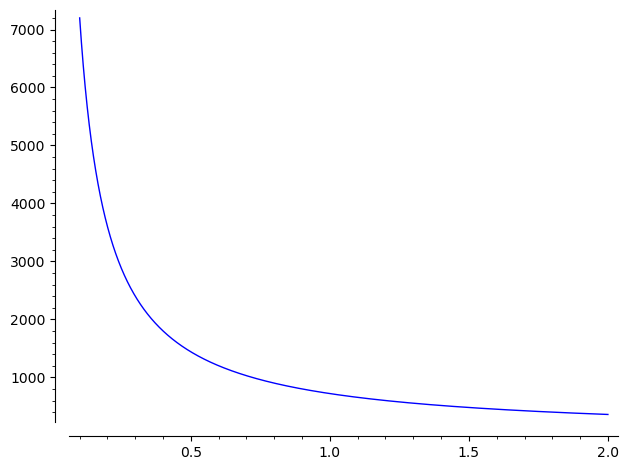

In [69]:
g = t^6 * exp(-t) * (exp(-5*t) + 57 * exp(-4*t) + 302 * exp(-3*t) + 302 * exp(-2*t) + 57 * exp(-t) + 1) / (1 - exp(-t))^7
plot(g, (t, 0.1, 2.0))

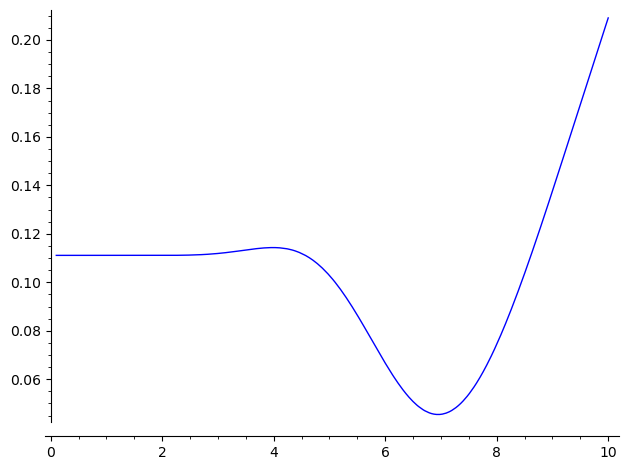

In [8]:
h = 1 - 8 * (exp(8*x) - 1 + 246 * (exp(7*x) - exp(x)) + 4046 * (exp(6*x) - exp(2*x)) + 11326 * (exp(5*x) - exp(3*x))) / (exp(8*x) + 1 + 502 * (exp(7*x) + exp(x)) + 14608 * (exp(6*x) + exp(2*x)) + 88234 * (exp(5*x) + exp(3*x)) + 156190 * exp(4*x)) / x
plot(h, (x, 0.1, 10.0))
# print(h.derivative().full_simplify())

In [2]:
def Fw(w):
    Xw1 = extremal_qm(w, 1)
    DXw1 = Xw1.derivative()
    DDXw1 = DXw1.derivative()
    return w * DXw1^2 - (w - 1) * Xw1 * DDXw1

def Gw(w):
    Xw2 = extremal_qm(w, 1)
    DXw2 = Xw2.derivative()
    DDXw2 = DXw2.derivative()
    return (w-1) * DXw2^2 - (w - 2) * Xw2 * DDXw2

In [3]:
print_qm(Fw(12), "F_12")
print_qm(Gw(12), "G_12")

F_12

q_expansion 4*q^4 + 56*q^5 + 168*q^6 - 4928*q^7 + 4384*q^8 + 76464*q^9 - 121744*q^10 + 41536*q^11 - 3998736*q^12 + 16213624*q^13 - 12220208*q^14 - 691008*q^15 - 170570496*q^16 + 605663408*q^17 - 1208530368*q^18 + 3079105344*q^19 + O(q^20) 

weight 28
depth 2
cusp order 4
polynomial (-1/1580182732800) * (-E4^3 + E6^2) * (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2) 

G_12

q_expansion 4*q^4 + 112*q^5 + 4176*q^6 + 134848*q^7 + 3010016*q^8 + 45201888*q^9 + 509114912*q^10 + 4559772800*q^11 + 33731187696*q^12 + 212635607536*q^13 + 1169096392352*q^14 + 5714886590784*q^15 + 25215438880512*q^16 + 101680179577312*q^17 + 378595927110528*q^18 + 1312932844288896*q^19 + O(q^20) 

weight 28
depth 4
cusp order 4
polynomial (-1/8691005030400) * (-6*E2^4*E4^2*E6^2 + 12*E2^3*E4^4*E6 + 12*E2^3*E4*E6^3 - 251*E2^2*E4^6 + 346*E2^2*E4^3*E6^2 - 131*E2^2*E6^4 + 252*E2*E4^5*E6 - 228*E2*E4^2*E6^3 + 125*E4^7 - 376*E4^4*E6^2 + 245*E4*E6^4) 



In [5]:
X_81 = extremal_qm(8, 1)
X_101 = extremal_qm(10, 1)
print_qm(X_81, "X_8,1")
print_qm(X_101, "X_10,1")
print_qm(qm_serre_derivative(X_81), "SX_8,1")

X_8,1

q_expansion q + 66*q^2 + 732*q^3 + 4228*q^4 + 15630*q^5 + 48312*q^6 + 117656*q^7 + 270600*q^8 + 533637*q^9 + 1031580*q^10 + 1771572*q^11 + 3094896*q^12 + 4826822*q^13 + 7765296*q^14 + 11441160*q^15 + 17318416*q^16 + 24137586*q^17 + 35220042*q^18 + 47045900*q^19 + O(q^20) 

weight 8
depth 1
cusp order 1
polynomial (-1/1008) * (E2*E6 - E4^2) 

X_10,1

q_expansion q + 258*q^2 + 6564*q^3 + 66052*q^4 + 390630*q^5 + 1693512*q^6 + 5764808*q^7 + 16909320*q^8 + 43066413*q^9 + 100782540*q^10 + 214358892*q^11 + 433565328*q^12 + 815730734*q^13 + 1487320464*q^14 + 2564095320*q^15 + 4328785936*q^16 + 6975757458*q^17 + 11111134554*q^18 + 16983563060*q^19 + O(q^20) 

weight 10
depth 1
cusp order 1
polynomial (-1/720) * E4 * (-E2*E4 + E6) 

SX_8,1

q_expansion 5/12*q + 215/2*q^2 + 2735*q^3 + 82565/3*q^4 + 325525/2*q^5 + 705630*q^6 + 7206010/3*q^7 + 7045550*q^8 + 71777355/4*q^9 + 41992725*q^10 + 89316205*q^11 + 180652220*q^12 + 2039326835/6*q^13 + 619716860*q^14 + 1068373050*q^15 + 5410982420/3*q

In [7]:
print_qm(E6.derivative(), "DE6")

DE6

q_expansion -504*q - 33264*q^2 - 368928*q^3 - 2130912*q^4 - 7877520*q^5 - 24349248*q^6 - 59298624*q^7 - 136382400*q^8 - 268953048*q^9 - 519916320*q^10 - 892872288*q^11 - 1559827584*q^12 - 2432718288*q^13 - 3913709184*q^14 - 5766344640*q^15 - 8728481664*q^16 - 12165343344*q^17 - 17750901168*q^18 - 23711133600*q^19 + O(q^20) 

weight 8
depth 1
cusp order 1
polynomial (1/2) * (E2*E6 - E4^2) 



t^6*(57*e^(-t) + 604*e^(-2*t) + 206568*e^(-12*t))*e^(-t)/(e^(-t) - 1)^7 + t^6*(57*e^(-t) + 302*e^(-2*t) + 17214*e^(-12*t) + 1)*e^(-t)/(e^(-t) - 1)^7 - 6*t^5*(57*e^(-t) + 302*e^(-2*t) + 17214*e^(-12*t) + 1)*e^(-t)/(e^(-t) - 1)^7 - 7*t^6*(57*e^(-t) + 302*e^(-2*t) + 17214*e^(-12*t) + 1)*e^(-2*t)/(e^(-t) - 1)^8


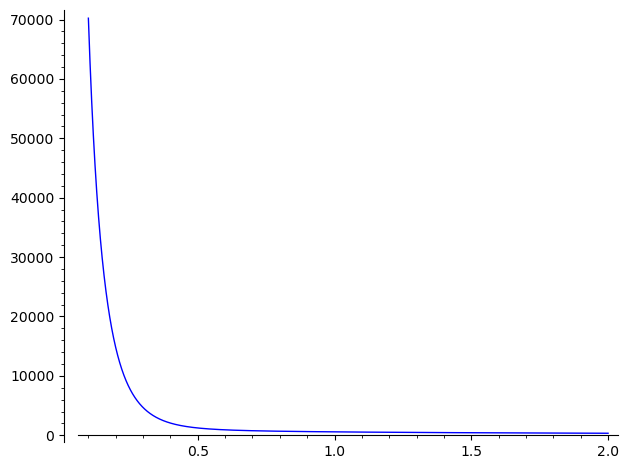

In [11]:
ftn = t^6* e^(-t) * (e^(-5*t) * 57 * e^(-4*t) * 302 * e^(-3*t) + 302 * e^(-2*t) + 57 * e^(-t) + 1) / (1 - e^(-t))^7
dftn = ftn.derivative(t)
print(dftn.simplify())
plot(ftn, (t, 0.1, 2))

In [13]:
F = qm_serre_derivative(X_81, 12)
print_qm(F, "F")
print_qm(extremal_qm(10, 2), "X_10,2")

F

q_expansion 90*q^2 + 3120*q^3 + 35100*q^4 + 223200*q^5 + 1002600*q^6 + 3529440*q^7 + 10531800*q^8 + 27331200*q^9 + 64619100*q^10 + 139194000*q^11 + 283161840*q^12 + 537844320*q^13 + 984718800*q^14 + 1708912800*q^15 + 2894065200*q^16 + 4689584640*q^17 + 7483695570*q^18 + 11492636400*q^19 + O(q^20) 

weight 10
depth 2
cusp order 2
polynomial (-1/12096) * (-5*E2^2*E6 - 2*E2*E4^2 + 7*E4*E6) 

X_10,2

q_expansion q^2 + 104/3*q^3 + 390*q^4 + 2480*q^5 + 11140*q^6 + 39216*q^7 + 117020*q^8 + 303680*q^9 + 717990*q^10 + 1546600*q^11 + 9438728/3*q^12 + 5976048*q^13 + 10941320*q^14 + 18987920*q^15 + 32156280*q^16 + 52106496*q^17 + 83152173*q^18 + 127695960*q^19 + O(q^20) 

weight 10
depth 2
cusp order 2
polynomial (-1/1088640) * (-5*E2^2*E6 - 2*E2*E4^2 + 7*E4*E6) 



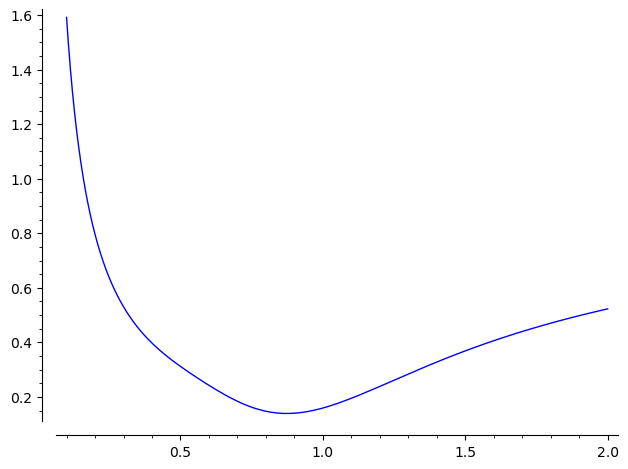

In [15]:
e2 = qm_to_func(E2)
x81 = qm_to_func(X_81)
dx81 = qm_to_func(X_81.derivative())
logderx81 = dx81 / x81
plot(logderx81 - 3 / pi / t, (t, 0.1, 2))

In [16]:
F = X_81.derivative().derivative() * X_81 - X_81.derivative()^2
print_qm(F, "F")

F

q_expansion 66*q^3 + 2928*q^4 + 86364*q^5 + 1366272*q^6 + 13586916*q^7 + 101017728*q^8 + 591754896*q^9 + 2872137984*q^10 + 11993482710*q^11 + 44258355264*q^12 + 147000947340*q^13 + 446875559424*q^14 + 1257339258828*q^15 + 3312194909184*q^16 + 8219070237888*q^17 + 19382035332096*q^18 + 43590086806122*q^19 + O(q^20) 

weight 20
depth 4
cusp order 3
polynomial (-1/20901888) * (-E2^4*E6^2 + 4*E2^3*E4^2*E6 + 4*E2^2*E4^4 - 10*E2^2*E4*E6^2 + 4*E2*E6^3 - 4*E4^5 + 3*E4^2*E6^2) 



In [ ]:
DX_81 = X_81.derivative()
DDX_81 = DX_81.derivative()
F2 = 7 * DX_81^2 - 6 * X_81 * DDX_81
print_qm(F2, "F2")

ls = [
    extremal_qm(20, 1),
    extremal_qm(16, 1) * E4,
    extremal_qm(16, 1) * extremal_qm(4, 2),
    extremal_qm(14, 1) * extremal_qm(6, 1),
    Disc * extremal_qm(8, 2),
    
]

F2

q_expansion q^2 - 132*q^3 + 4248*q^4 + 95384*q^5 + 1245852*q^6 + 13967352*q^7 + 101317568*q^8 + 587691936*q^9 + 2877553854*q^10 + 11999627860*q^11 + 44281218720*q^12 + 146798633592*q^13 + 447187338584*q^14 + 1257538195368*q^15 + 3311378578944*q^16 + 8219684886144*q^17 + 19379928298293*q^18 + 43595661841452*q^19 + O(q^20) 

weight 20
depth 4
cusp order 2
polynomial (1/20901888) * (E2^4*E6^2 - 4*E2^3*E4^2*E6 + 52*E2^2*E4^4 - 46*E2^2*E4*E6^2 - 28*E2*E4^3*E6 + 24*E2*E6^3 - 24*E4^5 + 25*E4^2*E6^2) 



In [25]:
X_101 = extremal_qm(10, 1)
DX_101 = X_101.derivative()
DDX_101 = DX_101.derivative()
F3 = 9 * DX_101^2 - 8 * X_101 * DDX_101
print_qm(F3, "F3")

F3

q_expansion q^2 - 1032*q^3 + 95592*q^4 + 2546720*q^5 + 69017868*q^6 + 1377972912*q^7 + 17657805248*q^8 + 163299884544*q^9 + 1212193845870*q^10 + 7417711883560*q^11 + 38749963772640*q^12 + 177257820999072*q^13 + 724640042539256*q^14 + 2688265273591440*q^15 + 9162528810840576*q^16 + 28989944477948544*q^17 + 85881150604038213*q^18 + 239905346107232088*q^19 + O(q^20) 

weight 24
depth 4
cusp order 2
polynomial (1/24883200) * (3*E2^4*E4^4 - 12*E2^3*E4^3*E6 - 130*E2^2*E4^5 + 148*E2^2*E4^2*E6^2 + 100*E2*E4^4*E6 - 112*E2*E4*E6^3 + 75*E4^6 - 120*E4^3*E6^2 + 48*E6^4) 



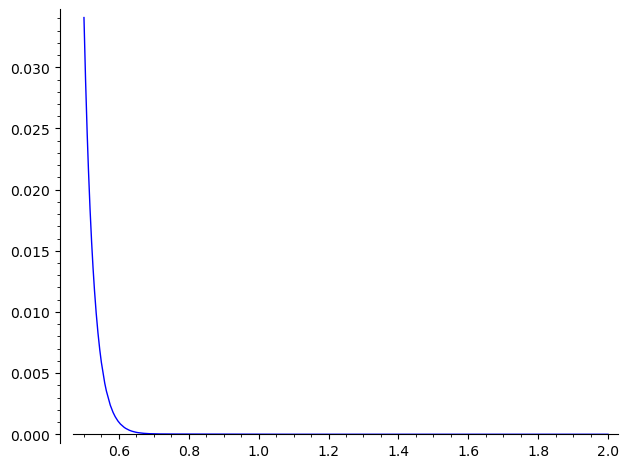

In [24]:
plot(qm_to_func(F2), (t, 0.5, 2))

In [2]:
X141 = extremal_qm(14, 1)
print_qm(X141, "X_14,1")

X_14,1

q_expansion q^2 + 128*q^3 + 4050*q^4 + 58880*q^5 + 525300*q^6 + 3338496*q^7 + 16582820*q^8 + 68121600*q^9 + 241314390*q^10 + 756976000*q^11 + 2151594536*q^12 + 5619414528*q^13 + 13681039400*q^14 + 31294513920*q^15 + 67923894600*q^16 + 140526375936*q^17 + 279161294013*q^18 + 533843395200*q^19 + O(q^20) 

weight 14
depth 1
cusp order 2
polynomial (1/4717440) * (7*E2*E4^3 + 5*E2*E6^2 - 12*E4^2*E6) 



X_10,1

q_expansion q + 258*q^2 + 6564*q^3 + 66052*q^4 + 390630*q^5 + 1693512*q^6 + 5764808*q^7 + 16909320*q^8 + 43066413*q^9 + 100782540*q^10 + 214358892*q^11 + 433565328*q^12 + 815730734*q^13 + 1487320464*q^14 + 2564095320*q^15 + 4328785936*q^16 + 6975757458*q^17 + 11111134554*q^18 + 16983563060*q^19 + O(q^20) 

weight 10
depth 1
cusp order 1
polynomial (-1/720) * E4 * (-E2*E4 + E6) 



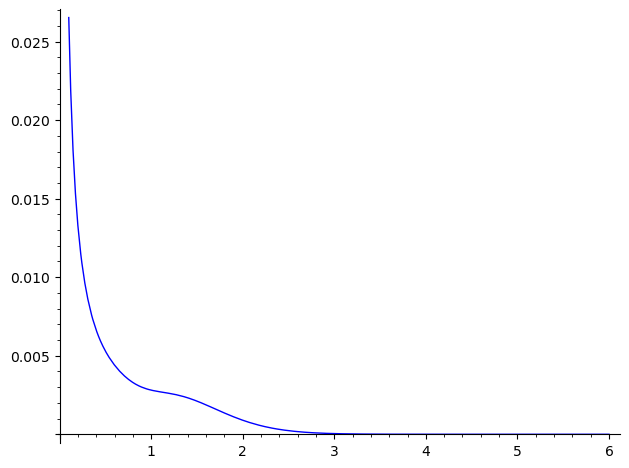

In [8]:
X_101 = extremal_qm(10, 1)
print_qm(X_101, "X_10,1")
ftn = t^8 * qm_to_func(X_101)
plot(ftn, (t, 0.1, 6.0))

In [26]:
from functools import lru_cache

@lru_cache(maxsize=None)
def a(w):
    assert w >= 6 and w % 2 == 0, "w must be an even integer >= 6"
    if w == 6:
        return 5
    elif w == 8:
        return 6
    elif w == 10:
        return 8
    else:
        if w % 6 == 0:
            return min(a(w-4) + 4, a(w-6) + 5)
        elif w % 6 == 2:
            return min(a(w-4) + 4, a(w-6) + 5)
        else:
            return min(a(w-4) + 4, a(w-6) + 5, a(w-8) + 7.1)

for w in range(6, 200, 2):
    print(f"w={w}, a(w)={a(w)}, w-1={w-1}, a(w)-(w-1)={a(w)- (w-1)}")


w=6, a(w)=5, w-1=5, a(w)-(w-1)=0
w=8, a(w)=6, w-1=7, a(w)-(w-1)=-1
w=10, a(w)=8, w-1=9, a(w)-(w-1)=-1
w=12, a(w)=10, w-1=11, a(w)-(w-1)=-1
w=14, a(w)=11, w-1=13, a(w)-(w-1)=-2
w=16, a(w)=13, w-1=15, a(w)-(w-1)=-2
w=18, a(w)=15, w-1=17, a(w)-(w-1)=-2
w=20, a(w)=16, w-1=19, a(w)-(w-1)=-3
w=22, a(w)=18, w-1=21, a(w)-(w-1)=-3
w=24, a(w)=20, w-1=23, a(w)-(w-1)=-3
w=26, a(w)=21, w-1=25, a(w)-(w-1)=-4
w=28, a(w)=23, w-1=27, a(w)-(w-1)=-4
w=30, a(w)=25, w-1=29, a(w)-(w-1)=-4
w=32, a(w)=26, w-1=31, a(w)-(w-1)=-5
w=34, a(w)=28, w-1=33, a(w)-(w-1)=-5
w=36, a(w)=30, w-1=35, a(w)-(w-1)=-5
w=38, a(w)=31, w-1=37, a(w)-(w-1)=-6
w=40, a(w)=33, w-1=39, a(w)-(w-1)=-6
w=42, a(w)=35, w-1=41, a(w)-(w-1)=-6
w=44, a(w)=36, w-1=43, a(w)-(w-1)=-7
w=46, a(w)=38, w-1=45, a(w)-(w-1)=-7
w=48, a(w)=40, w-1=47, a(w)-(w-1)=-7
w=50, a(w)=41, w-1=49, a(w)-(w-1)=-8
w=52, a(w)=43, w-1=51, a(w)-(w-1)=-8
w=54, a(w)=45, w-1=53, a(w)-(w-1)=-8
w=56, a(w)=46, w-1=55, a(w)-(w-1)=-9
w=58, a(w)=48, w-1=57, a(w)-(w-1)=-9
w=60, a(w)

In [3]:
DDisc = Disc.derivative()
DDDisc = DDisc.derivative()
print_qm(DDisc, "DDisc")
print_qm(DDDisc, "DDDisc")

DDisc

q_expansion q - 48*q^2 + 756*q^3 - 5888*q^4 + 24150*q^5 - 36288*q^6 - 117208*q^7 + 675840*q^8 - 1022787*q^9 - 1159200*q^10 + 5880732*q^11 - 4451328*q^12 - 7510594*q^13 + 5625984*q^14 + 18257400*q^15 + 15794176*q^16 - 117400878*q^17 + 49093776*q^18 + 202566980*q^19 + O(q^20) 

weight 14
depth 1
cusp order 1
polynomial (-1/1728) * E2 * (-E4^3 + E6^2) 

DDDisc

q_expansion q - 96*q^2 + 2268*q^3 - 23552*q^4 + 120750*q^5 - 217728*q^6 - 820456*q^7 + 5406720*q^8 - 9205083*q^9 - 11592000*q^10 + 64688052*q^11 - 53415936*q^12 - 97637722*q^13 + 78763776*q^14 + 273861000*q^15 + 252706816*q^16 - 1995814926*q^17 + 883687968*q^18 + 3848772620*q^19 + O(q^20) 

weight 16
depth 2
cusp order 1
polynomial (1/20736) * (-13*E2^2 + E4) * (-E4^3 + E6^2) 



F = E4 * Disc - DDDisc

q_expansion q^2 - 18*q^3 + 120*q^4 - 220*q^5 - 1620*q^6 + 11676*q^7 - 30400*q^8 + 19440*q^9 + 73230*q^10 - 141350*q^11 + 22176*q^12 - 296268*q^13 + 1701560*q^14 - 1436940*q^15 - 5091840*q^16 + 11674176*q^17 - 5006043*q^18 - 7325370*q^19 + O(q^20) 

weight 16
depth 2
cusp order 2
polynomial (-1/497664) * (-E2^2 + E4) * (-E4^3 + E6^2) 

[0, 0, 1, -18, 120, -220, -1620, 11676, -30400, 19440, 73230, -141350, 22176, -296268, 1701560, -1436940, -5091840, 11674176, -5006043, -7325370, 11434640, -24323040, 34156452, -1317868, 4458240, -38029200, -161631610, 358886700, 63701568, -464399180, -36518040, 392214000, 149016576, -691145136, 525807090, 788936680, -834627240, -2513468124, 2266492700, 2749384260, -2773622400, 3602639600, -7114570848, -1476723318, 5799497440, 3038136660, 9577631400, -29958454424, 12498757632, 23375352000, -24151322825, -3160472580, -15831096624, 36155359332, 24099077880, -21597119940, -22673799680, -44752568400, 7679752950, 89495112290, 1290709728

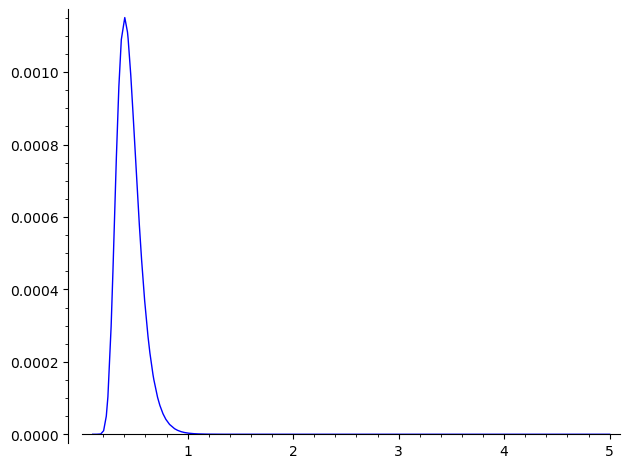

In [14]:
F = (E4 * Disc - DDDisc) / 312
print_qm(F, "F = E4 * Disc - DDDisc")
print(F.coefficients(range(100)))
N = 100000
coeffs = F.coefficients(range(1, N + 1))
cnt_pos = sum(1 for c in coeffs if c > 0)
print(f"Proportion of positive coefficients up to q^{N}: {cnt_pos / N}")
ftn = qm_to_func(F)
plot(ftn, (0.1, 5))

In [2]:
print_qm(E4, "E4")

E4

q_expansion 1 + 240*q + 2160*q^2 + 6720*q^3 + 17520*q^4 + 30240*q^5 + 60480*q^6 + 82560*q^7 + 140400*q^8 + 181680*q^9 + 272160*q^10 + 319680*q^11 + 490560*q^12 + 527520*q^13 + 743040*q^14 + 846720*q^15 + 1123440*q^16 + 1179360*q^17 + 1635120*q^18 + 1646400*q^19 + O(q^20) 

weight 4
depth 0
cusp order 0
polynomial E4 



In [6]:
X61 = extremal_qm(12, 1)
print(X61.polynomial())
for k, v in X61._polynomial().dict().items():
    print(k, v)

-1/332640*E2*E4*E6 + 1/798336*E4^3 + 1/570240*E6^2
0 1/332640 - 1/1155*q + 471/770*q^2 + 8284/165*q^3 + 2767069/2310*q^4 + 153042/11*q^5 + O(q^6)
1 -1/332640 + 1/1260*q + 57/140*q^2 + 703/45*q^3 + 262657/1260*q^4 + 15501/10*q^5 + O(q^6)


In [9]:
def modular_comp(qm):
    # Extract modular form components of a given quasimodular form
    # In other words, if F = f_0 + f_1 E2 + f_2 E2^2 + ... + f_n E2^n,
    # return [f_0, f_1, f_2, ..., f_n]
    comps = {}
    for k, v in qm._polynomial().dict().items():
        if k not in comps:
            comps[k] = 0
        comps[k] += v
    return sorted(comps.items())


In [16]:
for w in range(12, 60, 2):
    Xw1 = extremal_qm(w, 1)
    for k, v in modular_comp(Xw1):
        if k == 1:
            v = QM(v)
            print_qm(v, f"B_{w-2}")

B_10

q_expansion -1/332640 + 1/1260*q + 57/140*q^2 + 703/45*q^3 + 262657/1260*q^4 + 15501/10*q^5 + 40071/5*q^6 + 10088402/315*q^7 + 2988453/28*q^8 + 387440173/1260*q^9 + 7952013/10*q^10 + 65498547/35*q^11 + 184647871/45*q^12 + 757464241/90*q^13 + 575038914/35*q^14 + 152560842/5*q^15 + 68853957121/1260*q^16 + 941173623/10*q^17 + 22084089861/140*q^18 + 2304912127/9*q^19 + O(q^20) 

weight 10
depth 0
cusp order 0
polynomial (-1/332640) * E4 * E6 

B_12

q_expansion 1/393120 + 1/2*q^2 + 128/3*q^3 + 2025/2*q^4 + 11776*q^5 + 87550*q^6 + 476928*q^7 + 4145705/2*q^8 + 22707200/3*q^9 + 24131439*q^10 + 68816000*q^11 + 537898634/3*q^12 + 432262656*q^13 + 977217100*q^14 + 2086300928*q^15 + 8490486825/2*q^16 + 8266257408*q^17 + 31017921557/2*q^18 + 28097020800*q^19 + O(q^20) 

weight 12
depth 0
cusp order 0
polynomial (1/4717440) * (7*E4^3 + 5*E6^2) 

B_14

q_expansion -1/332640 + 1/13860*q + 2731/4620*q^2 + 398581/3465*q^3 + 9588151/1980*q^4 + 203450521/2310*q^5 + 1088524711/1155*q^6 + 24222252602

In [21]:
for w in range(12, 60, 2):
    Xw1 = extremal_qm(w, 1)
    DXw1 = Xw1.derivative()
    DDXw1 = DXw1.derivative()
    Mw = w * DXw1 ^ 2 - (w - 1) * Xw1 * DDXw1
    print_qm(Mw, f"M_{w}")

M_12

q_expansion 4*q^4 + 56*q^5 + 168*q^6 - 4928*q^7 + 4384*q^8 + 76464*q^9 - 121744*q^10 + 41536*q^11 - 3998736*q^12 + 16213624*q^13 - 12220208*q^14 - 691008*q^15 - 170570496*q^16 + 605663408*q^17 - 1208530368*q^18 + 3079105344*q^19 + O(q^20) 

weight 28
depth 2
cusp order 4
polynomial (-1/1580182732800) * (-E4^3 + E6^2) * (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2) 

M_14

q_expansion 4*q^4 - 128*q^5 + 1656*q^6 - 8960*q^7 - 21280*q^8 + 684288*q^9 - 4972528*q^10 + 17223680*q^11 - 6607440*q^12 - 221786240*q^13 + 1067785712*q^14 - 2220800256*q^15 + 815953152*q^16 + 5019685120*q^17 - 1839412800*q^18 - 22470687744*q^19 + O(q^20) 

weight 32
depth 2
cusp order 4
polynomial (1/270888468480) * (-7*E2^2*E4 + 2*E2*E6 + 5*E4^2) * (-E4^3 + E6^2)^2 

M_16

q_expansion 4*q^4 - 888*q^5 + 58056*q^6 + 820288*q^7 + 11281056*q^8 + 75058128*q^9 - 183895888*q^10 - 2009386560*q^11 + 489092976*q^12 - 5245627064*q^13 + 114572612112*q^14 + 112549721664*q^15 - 1134131866368*q^16 - 59

In [24]:
print_qm(extremal_qm(8, 2) * Disc^2 * 4, "X82")

X82

q_expansion 4*q^4 - 128*q^5 + 1656*q^6 - 8960*q^7 - 21280*q^8 + 684288*q^9 - 4972528*q^10 + 17223680*q^11 - 6607440*q^12 - 221786240*q^13 + 1067785712*q^14 - 2220800256*q^15 + 815953152*q^16 + 5019685120*q^17 - 1839412800*q^18 - 22470687744*q^19 + O(q^20) 

weight 32
depth 2
cusp order 4
polynomial (1/270888468480) * (-7*E2^2*E4 + 2*E2*E6 + 5*E4^2) * (-E4^3 + E6^2)^2 



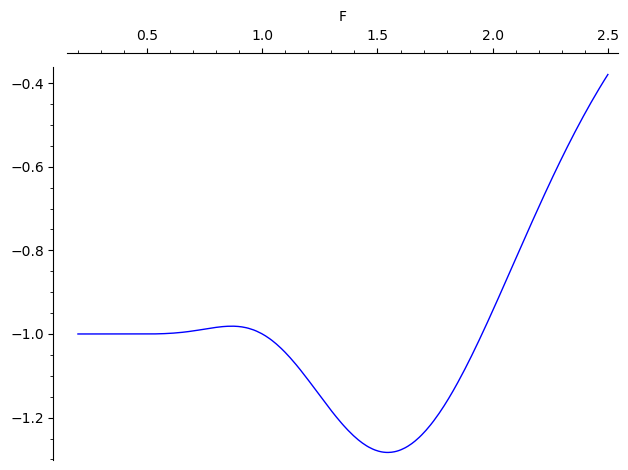

In [19]:
ftn = t^10 * (qm_to_func(E4 * E6) - 1)
# ftn = qm_to_func(E4)
plot(ftn, (0.2, 2.5), title="F")

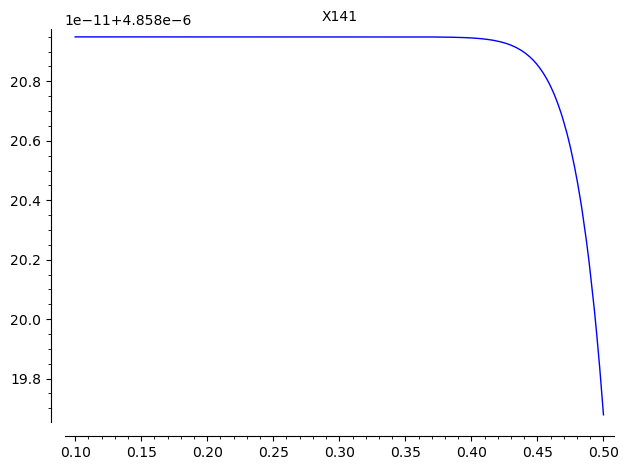

In [20]:
X141 = extremal_qm(14, 1)
ftn = t^13 * qm_to_func(X141)
plot(ftn, (0.1, 0.5), title="X141")

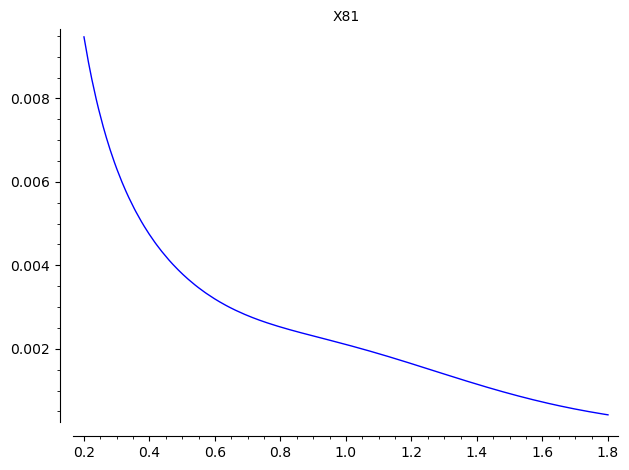

In [40]:
X81 = extremal_qm(8, 1)
ftn = t^6 * qm_to_func(X81)
plot(ftn, (0.2, 1.8), title="X81")

In [2]:
X_10_1 = extremal_qm(10, 1)
print_qm(X_10_1, "X_10_1")

X_10_1

q_expansion q + 258*q^2 + 6564*q^3 + 66052*q^4 + 390630*q^5 + 1693512*q^6 + 5764808*q^7 + 16909320*q^8 + 43066413*q^9 + 100782540*q^10 + 214358892*q^11 + 433565328*q^12 + 815730734*q^13 + 1487320464*q^14 + 2564095320*q^15 + 4328785936*q^16 + 6975757458*q^17 + 11111134554*q^18 + 16983563060*q^19 + O(q^20) 

weight 10
depth 1
cusp order 1
polynomial (-1/720) * E4 * (-E2*E4 + E6) 



In [3]:
DX_10_1 = X_10_1.derivative()
DDX_10_1 = DX_10_1.derivative()
F = 10 * DX_10_1^2 - 9 * X_10_1 * DDX_10_1
print_qm(F, "F")
F_fac = (45*E2^2*E4^2 - 36*E2*E4*E6 - 25*E4^3 + 16*E6^2) / (-4320)
print_qm(F_fac, "factor")

X_12_1 = extremal_qm(12, 1)
print_qm(X_12_1, "X_12_1")
X_12_2 = extremal_qm(12, 2)
print_qm(X_12_2, "X_12_2")

F

q_expansion q^2 - 1290*q^3 + 69336*q^4 + 258740*q^5 - 5397876*q^6 - 4973076*q^7 + 203073344*q^8 - 559491408*q^9 - 498782610*q^10 + 1753017970*q^11 + 9702655008*q^12 - 15533923068*q^13 - 75773087752*q^14 + 148385214180*q^15 + 138847385088*q^16 + 89928732480*q^17 - 2129323444155*q^18 + 2979109809774*q^19 + O(q^20) 

weight 24
depth 2
cusp order 2
polynomial (1/7464960) * (-E4^3 + E6^2) * (45*E2^2*E4^2 - 36*E2*E4*E6 - 25*E4^3 + 16*E6^2) 

factor

q_expansion q - 1266*q^2 + 38700*q^3 + 1508044*q^4 + 19174398*q^5 + 138272616*q^6 + 714947576*q^7 + 2908187736*q^8 + 9931590549*q^9 + 29598293988*q^10 + 79136487012*q^11 + 193654620432*q^12 + 439870565078*q^13 + 939463630224*q^14 + 1899047002536*q^15 + 3669987922864*q^16 + 6797408460210*q^17 + 12167400309030*q^18 + 21052220455964*q^19 + O(q^20) 

weight 12
depth 2
cusp order 1
polynomial (-1/4320) * (45*E2^2*E4^2 - 36*E2*E4*E6 - 25*E4^3 + 16*E6^2) 

X_12_1

q_expansion q^2 + 56*q^3 + 1002*q^4 + 9296*q^5 + 57708*q^6 + 269040*q^7 + 1024532*q^8 +

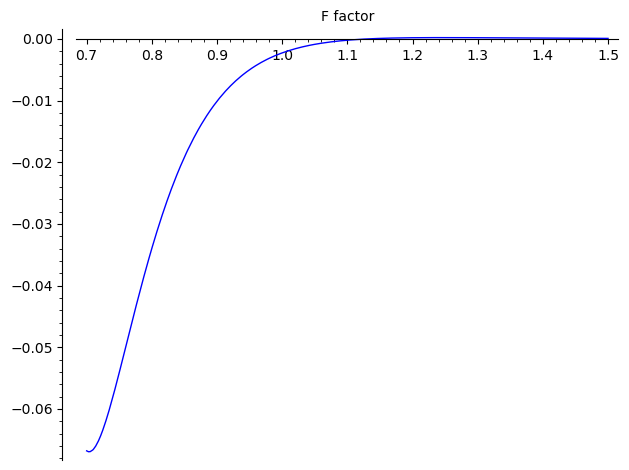

In [4]:
f_fac = qm_to_func(F_fac)
plot(f_fac, (0.7, 1.5), title="F factor")

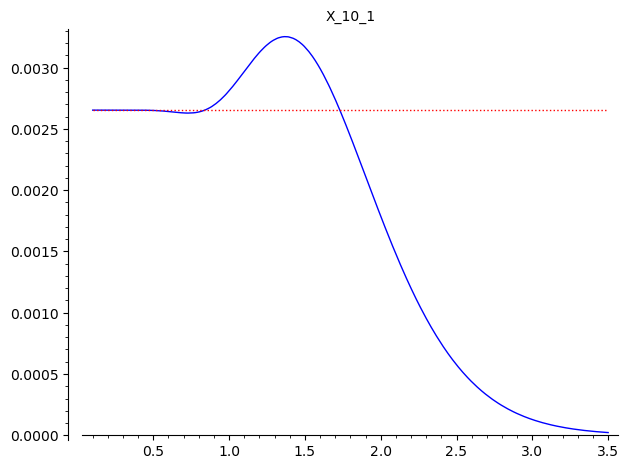

In [5]:
t = var('t')
f10 = t^9 * qm_to_func(X_10_1)
plot(f10, (0.1, 3.5), title="X_10_1") + plot(lambda t : 1 / (120 * pi), (0.1, 3.5), color='red', linestyle='dotted')

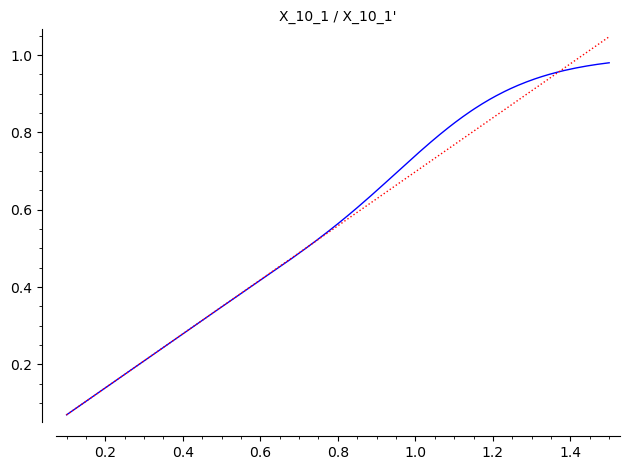

In [6]:
plot(qm_to_func(X_10_1) / qm_to_func(X_10_1.derivative()), (0.1, 1.5), title="X_10_1 / X_10_1'") + plot(lambda t : 2 * pi * t / 9, (0.1, 1.5), color='red', linestyle='dotted')

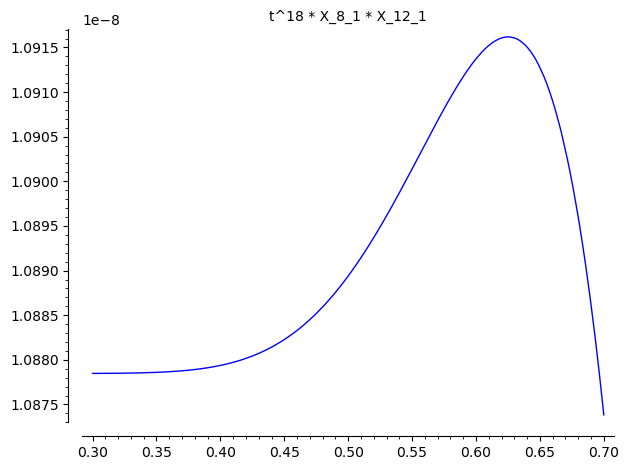

In [11]:
X_8_1 = extremal_qm(8, 1)
X_12_1 = extremal_qm(12, 1)
ftn = t^18 * qm_to_func(X_8_1 * X_12_1)
plot(ftn, (0.3, 0.7), title="t^18 * X_8_1 * X_12_1")

In [6]:
X_12_1 = extremal_qm(12, 1)
DX_12_1 = X_12_1.derivative()
DDX_12_1 = DX_12_1.derivative()
G = 12 * DX_12_1^2 - 11 * X_12_1 * DDX_12_1
print_qm(G, "G")

G

q_expansion 4*q^4 + 56*q^5 + 168*q^6 - 4928*q^7 + 4384*q^8 + 76464*q^9 - 121744*q^10 + 41536*q^11 - 3998736*q^12 + 16213624*q^13 - 12220208*q^14 - 691008*q^15 - 170570496*q^16 + 605663408*q^17 - 1208530368*q^18 + 3079105344*q^19 + O(q^20) 

weight 28
depth 2
cusp order 4
polynomial (-1/1580182732800) * (-E4^3 + E6^2) * (49*E2^2*E4^3 - 25*E2^2*E6^2 - 48*E2*E4^2*E6 - 25*E4^4 + 49*E4*E6^2) 



In [36]:
X_8_1 = extremal_qm(8, 1)
print_qm(X_8_1, "X_8_1")
DX_8_1 = X_8_1.derivative()
print_qm(DX_8_1, "X_8_1'")

X_8_1

q_expansion q + 66*q^2 + 732*q^3 + 4228*q^4 + 15630*q^5 + 48312*q^6 + 117656*q^7 + 270600*q^8 + 533637*q^9 + 1031580*q^10 + 1771572*q^11 + 3094896*q^12 + 4826822*q^13 + 7765296*q^14 + 11441160*q^15 + 17318416*q^16 + 24137586*q^17 + 35220042*q^18 + 47045900*q^19 + O(q^20) 

weight 8
depth 1
cusp order 1
polynomial (-1/1008) * (E2*E6 - E4^2) 

X_8_1'

q_expansion q + 132*q^2 + 2196*q^3 + 16912*q^4 + 78150*q^5 + 289872*q^6 + 823592*q^7 + 2164800*q^8 + 4802733*q^9 + 10315800*q^10 + 19487292*q^11 + 37138752*q^12 + 62748686*q^13 + 108714144*q^14 + 171617400*q^15 + 277094656*q^16 + 410338962*q^17 + 633960756*q^18 + 893872100*q^19 + O(q^20) 

weight 10
depth 2
cusp order 1
polynomial (-1/1728) * (E2^2*E6 - 2*E2*E4^2 + E4*E6) 



In [37]:
print_qm(X_10_1, "X_10_1")
print_qm(X_10_1.derivative(), "X_10_1'")

X_10_1

q_expansion q + 258*q^2 + 6564*q^3 + 66052*q^4 + 390630*q^5 + 1693512*q^6 + 5764808*q^7 + 16909320*q^8 + 43066413*q^9 + 100782540*q^10 + 214358892*q^11 + 433565328*q^12 + 815730734*q^13 + 1487320464*q^14 + 2564095320*q^15 + 4328785936*q^16 + 6975757458*q^17 + 11111134554*q^18 + 16983563060*q^19 + O(q^20) 

weight 10
depth 1
cusp order 1
polynomial (-1/720) * E4 * (-E2*E4 + E6) 

X_10_1'

q_expansion q + 516*q^2 + 19692*q^3 + 264208*q^4 + 1953150*q^5 + 10161072*q^6 + 40353656*q^7 + 135274560*q^8 + 387597717*q^9 + 1007825400*q^10 + 2357947812*q^11 + 5202783936*q^12 + 10604499542*q^13 + 20822486496*q^14 + 38461429800*q^15 + 69260574976*q^16 + 118587876786*q^17 + 200000421972*q^18 + 322687698140*q^19 + O(q^20) 

weight 12
depth 2
cusp order 1
polynomial (1/8640) * (9*E2^2*E4^2 - 18*E2*E4*E6 + 5*E4^3 + 4*E6^2) 

